#<center> <b>ITI-105 Project</b></center>


#<center><b>User Authentication Using Classical Machine Learning:  Leveraging Key Typing Dynamics Behavior</b></center>

## Allen Lee and Jacob Abraham


## 1.	Business Problem statement and Solution

* ### 1.1	Problem statement
Computing devices, including mobile phones, utilize various biometric authentication methods like fingerprints or facial features to identify users. However, these methods rely on specific hardware, which can increase the overall cost.

* ### 1.2 Problem Solution
An economical alternative is to authenticate users based on their behavior, such as typing dynamics.

## 2.	User Authentication using Classical Machine Learning - Generate and Analyze ML models




### 2.1. Analyze Keystroke dynamics with benchmark dataset (Ref: http://www.cs.cmu.edu/~keystroke/)

In [1]:
import os
import logging
logging.getLogger("mlflow").setLevel(logging.ERROR)  # Or logging.WARNING


def is_running_in_colab():
    return "google.colab" in str(get_ipython())

def is_running_in_jupyter_notebook():
    return "ipykernel" in str(get_ipython())

if is_running_in_colab():
    print("Running in Google Colab")
elif is_running_in_jupyter_notebook():
    print("Running in local Jupyter Notebook")
else:
    print("Not running in either Google Colab or local Jupyter Notebook")

Running in Google Colab


In [ ]:
# if is_running_in_colab():
#   !pip install mlflow --quiet
#   !pip install pyngrok --quiet

#### Import packages

In [ ]:
# Import MLFlow
# from mlflow import log_metric, log_param, log_params, log_artifacts

# from pyngrok import ngrok

In [2]:
import sklearn
print("sklearn version: ", sklearn.__version__)

sklearn version:  1.2.2


In [14]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# serialisation library
import pickle

from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tabulate import tabulate
from sklearn.pipeline import Pipeline

In [15]:
# from sklearn.ensemble.partial_dependence import plot_partial_dependence
# from sklearn import partial_dependence
# from sklearn.datasets import make_friedman1
# from sklearn.ensemble import GradientBoostingRegressor
# X, y = make_friedman1()
# clf = GradientBoostingRegressor(n_estimators=10).fit(X, y)
# plot_partial_dependence(clf, X, [0, (0, 1)])

In [ ]:
# if is_running_in_jupyter_notebook():
#   mlflow.autolog()

In [ ]:
# if is_running_in_colab():
#   with mlflow.start_run(run_name="ITI105 Project MLflow on Colab"):
#     mlflow.log_metric("m1", 2.0)
#     mlflow.log_param("p1", "mlflow-colab")

#   # run tracking UI in the background
#   get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background


#   # create remote tunnel using ngrok.com to allow local port access
#   # borrowed from https://colab.research.google.com/github/alfozan/MLflow-GBRT-demo/blob/master/MLflow-GBRT-demo.ipynb#scrollTo=4h3bKHMYUIG6



#   # Terminate open tunnels if exist
#   ngrok.kill()

#   # Setting the authtoken (optional)
#   # Get your authtoken from https://dashboard.ngrok.com/auth
#   NGROK_AUTH_TOKEN = ""
#   ngrok.set_auth_token(NGROK_AUTH_TOKEN)

#   # Open an HTTPs tunnel on port 5000 for http://localhost:5000
#   ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
#   print("MLflow Tracking UI:", ngrok_tunnel.public_url)

#### Load benchmark data set

In [16]:
# Load data and perform Exploratory Data Analysis (EDA)

if is_running_in_colab():
  from google.colab import drive
  drive.mount('/content/drive')
  data_dir_path='/content/drive/My Drive/NYP_AI/ITI105/AL_JA/'

  df = pd.read_csv(data_dir_path + 'DSL-StrongPasswordData.csv')
  df_bench = pd.concat([df['subject'], df.iloc[:,1:].astype('float32')], axis=1, sort=False)

if is_running_in_jupyter_notebook():
  df = pd.read_csv('DSL-StrongPasswordData.csv')
  df_bench = pd.concat([df['subject'], df.iloc[:,1:].astype('float32')], axis=1, sort=False)

print("Data shape (rows, cols):", df_bench.shape)
df_bench.head()

Mounted at /content/drive
Data shape (rows, cols): (20400, 34)


,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1.0,1.0,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1.0,2.0,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1.0,3.0,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1.0,4.0,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1.0,5.0,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


#### Perform Exploratory Data Analyzis

In [17]:
# view dataset information
df_bench.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject          20400 non-null  object 
 1   sessionIndex     20400 non-null  float32
 2   rep              20400 non-null  float32
 3   H.period         20400 non-null  float32
 4   DD.period.t      20400 non-null  float32
 5   UD.period.t      20400 non-null  float32
 6   H.t              20400 non-null  float32
 7   DD.t.i           20400 non-null  float32
 8   UD.t.i           20400 non-null  float32
 9   H.i              20400 non-null  float32
 10  DD.i.e           20400 non-null  float32
 11  UD.i.e           20400 non-null  float32
 12  H.e              20400 non-null  float32
 13  DD.e.five        20400 non-null  float32
 14  UD.e.five        20400 non-null  float32
 15  H.five           20400 non-null  float32
 16  DD.five.Shift.r  20400 non-null  float32
 17  UD.five.Shif

In [18]:
# view dataset information
df_bench.describe()

,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,...,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,4.500000,25.500000,0.093379,0.264148,0.170769,0.085727,0.169085,0.083358,0.081565,0.159372,...,0.106259,0.150670,0.044411,0.089899,0.202630,0.112731,0.095589,0.321847,0.226259,0.088306
std,2.291344,14.431223,0.029626,0.220534,0.226836,0.027424,0.123546,0.125755,0.026887,0.226928,...,0.038828,0.107422,0.105197,0.030738,0.150191,0.159571,0.028348,0.225389,0.230759,0.027452
min,1.000000,1.000000,0.001400,0.018700,-0.235800,0.009300,0.001100,-0.162100,0.003200,0.001400,...,0.004000,0.001100,-0.235500,0.003700,0.001300,-0.175800,0.003700,0.008300,-0.124500,0.002900
25%,2.750000,13.000000,0.074400,0.146900,0.049800,0.066000,0.113600,0.027200,0.062000,0.089300,...,0.082100,0.096100,-0.009000,0.067300,0.127600,0.023500,0.077400,0.210000,0.114100,0.069900
50%,4.500000,25.500000,0.089500,0.205950,0.108700,0.081000,0.140400,0.057800,0.077100,0.120900,...,0.101900,0.125000,0.022700,0.085300,0.172500,0.095500,0.093700,0.263000,0.160300,0.085500
75%,6.250000,38.000000,0.107900,0.306450,0.212400,0.099800,0.183900,0.096400,0.096900,0.173100,...,0.122300,0.174600,0.068900,0.107900,0.228800,0.145700,0.111100,0.350200,0.255100,0.103700
max,8.000000,50.000000,0.376100,12.506100,12.451700,0.241100,4.919700,4.799900,0.331200,25.987301,...,2.035300,3.327800,2.524200,0.357700,4.025200,3.978200,0.340700,5.883600,5.836400,0.265100


#### Feature selection and data pre-processing for training and testing

In [19]:
df_bench.columns

Index(['subject', 'sessionIndex', 'rep', 'H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return'],
      dtype='object')

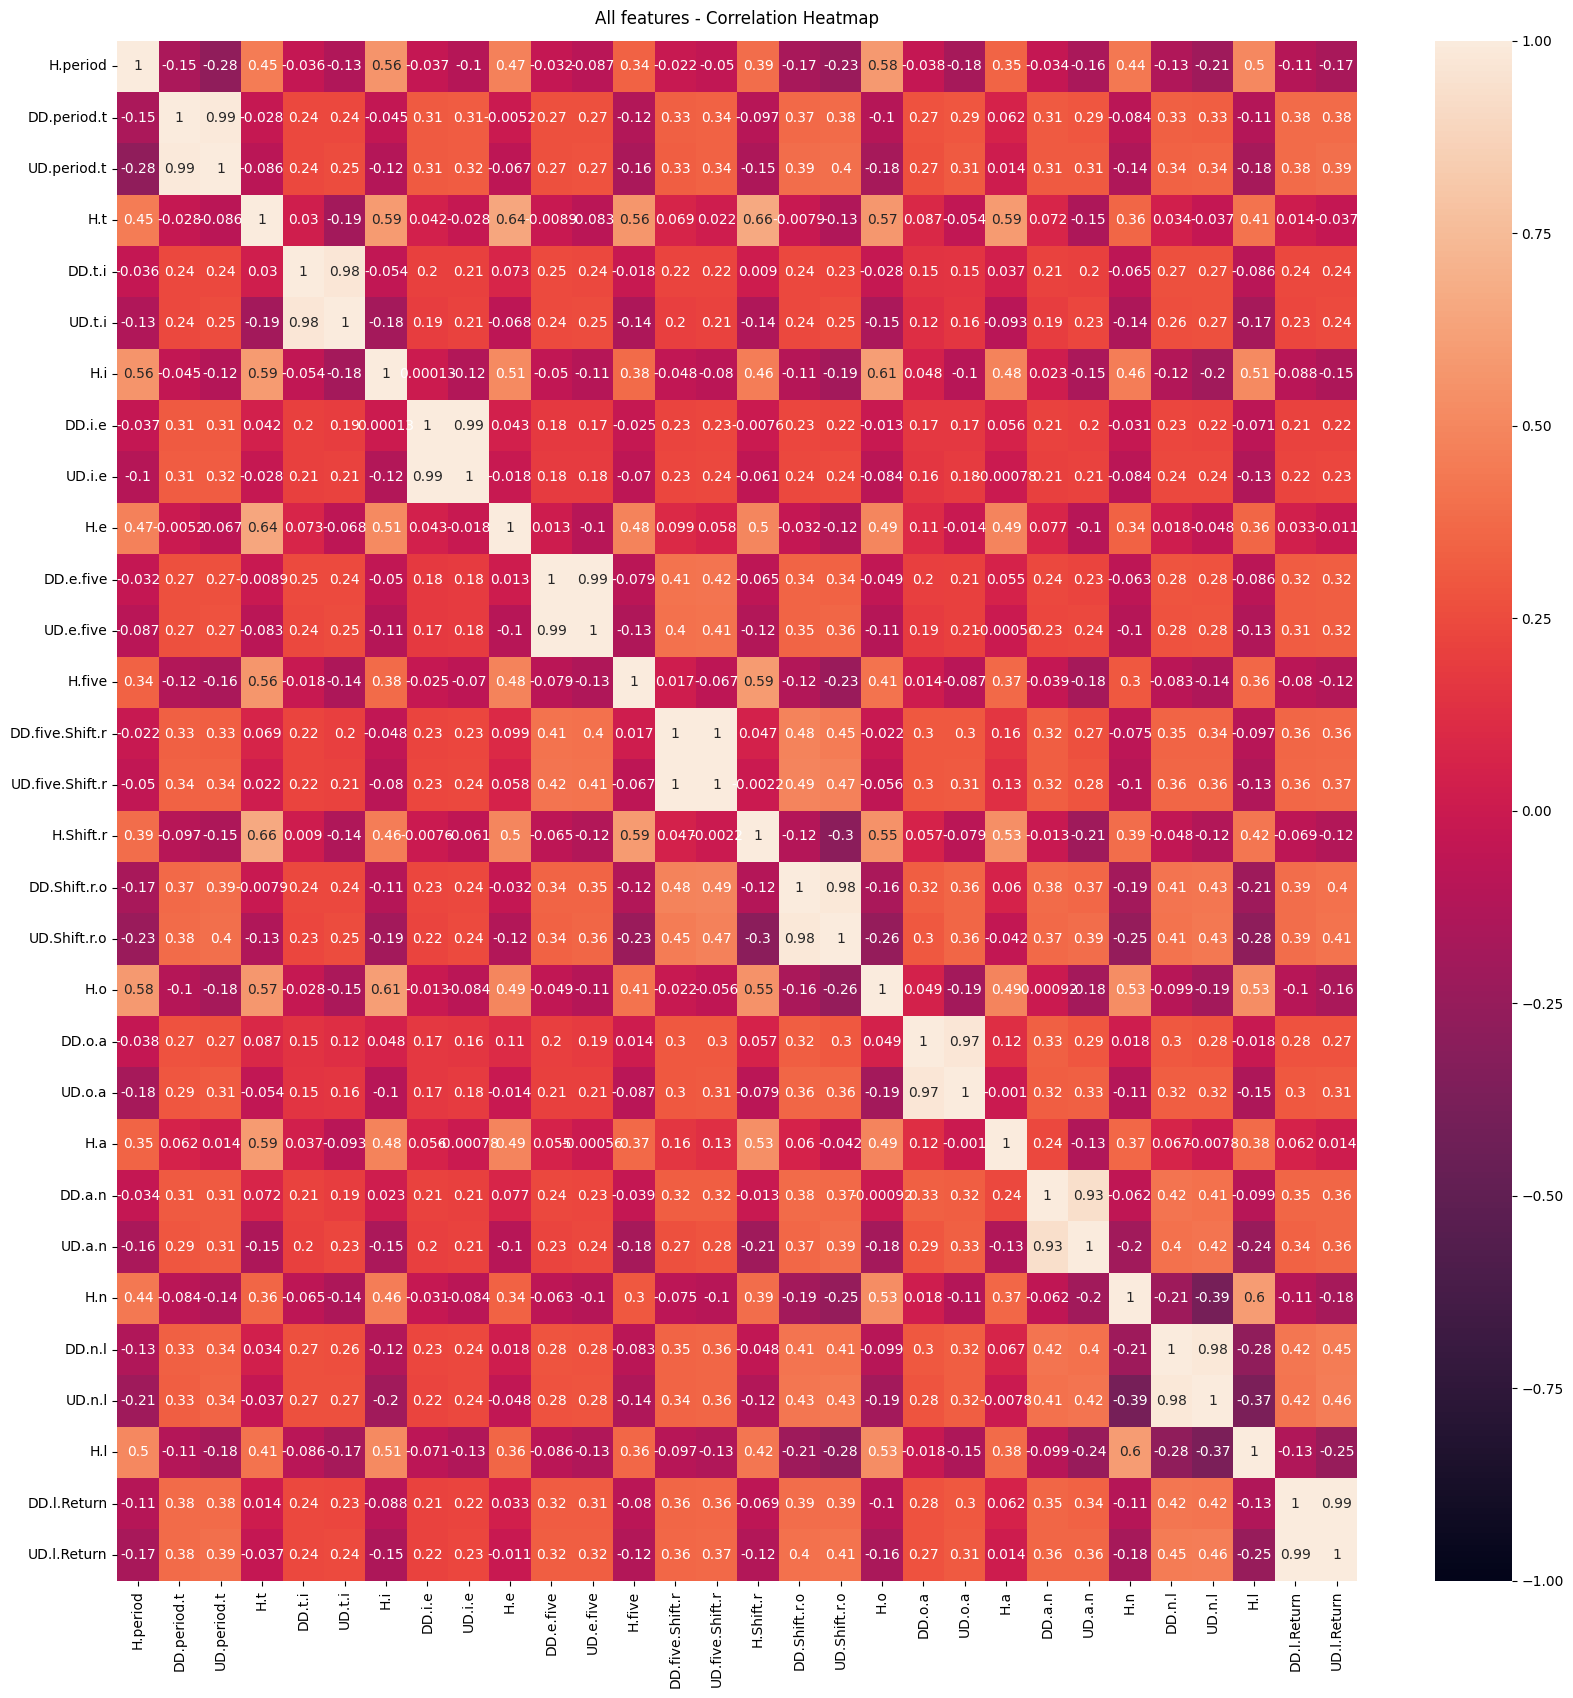

In [20]:
# Pick out the feature columns
feature_columns = df_bench.columns[3:33]
features = df_bench[feature_columns]

# Correlation
#print(features.corr())

plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(features.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('All features - Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<b>Conclusions:</b>

* From the correlation analysis above, it can be observed that the "DD" feature series data of any keystroke is highly correlated (r > 0.9) to its corresponding "UD" series data.  

* This is expected as the "UD" timing of each transition keystroke is a component of the "DD" timing of the same keystroke.

* Therefore, to avoid complexity due to correlated features and to achieve better accuracy, all the "DD" series data will be dropped in the feature selection step.

* This will reduce the number of features of the original dataset from <b>31</b> to <b>21</b>.

In [21]:
# Drop columns (features) that have "DD." in their name as these columns
# are sum of their corresponding 'Hold' and 'Up-Down' column values
col_names = [item for item in df_bench.columns if "DD." not in item] # regex='^(?!.*DD).*'
print(col_names)
df_bench = df_bench[col_names]
print(df_bench.shape)
df_bench.head()

['subject', 'sessionIndex', 'rep', 'H.period', 'UD.period.t', 'H.t', 'UD.t.i', 'H.i', 'UD.i.e', 'H.e', 'UD.e.five', 'H.five', 'UD.five.Shift.r', 'H.Shift.r', 'UD.Shift.r.o', 'H.o', 'UD.o.a', 'H.a', 'UD.a.n', 'H.n', 'UD.n.l', 'H.l', 'UD.l.Return', 'H.Return']
(20400, 24)


,subject,sessionIndex,rep,H.period,UD.period.t,H.t,UD.t.i,H.i,UD.i.e,H.e,...,UD.Shift.r.o,H.o,UD.o.a,H.a,UD.a.n,H.n,UD.n.l,H.l,UD.l.Return,H.Return
0,s002,1.0,1.0,0.1491,0.2488,0.1069,0.0605,0.1169,0.1043,0.1417,...,0.6523,0.1016,0.1120,0.1349,0.0135,0.0932,0.2583,0.1338,0.2171,0.0742
1,s002,1.0,2.0,0.1111,0.2340,0.0694,0.0589,0.0908,0.0449,0.0829,...,0.6307,0.1066,0.0618,0.1412,0.1146,0.1146,0.1496,0.0839,0.1917,0.0747
2,s002,1.0,3.0,0.1328,0.0744,0.0731,0.0560,0.0821,0.0721,0.0808,...,0.5741,0.1365,0.1566,0.1621,0.0711,0.1172,0.1533,0.1085,0.1762,0.0945
3,s002,1.0,4.0,0.1291,0.1224,0.1059,0.1436,0.1040,0.0998,0.0900,...,0.6096,0.0956,0.0574,0.1457,0.0172,0.0866,0.1475,0.0845,0.2387,0.0813
4,s002,1.0,5.0,0.1249,0.1068,0.0895,0.0781,0.0903,0.0686,0.0805,...,0.6389,0.0430,0.1545,0.1312,0.0270,0.0884,0.1633,0.0903,0.1614,0.0818


In [22]:
X = df_bench.drop(columns=['subject', 'sessionIndex', 'rep'])
y = df_bench['subject']
print(X.columns)
# print(X)
# print(y)

Index(['H.period', 'UD.period.t', 'H.t', 'UD.t.i', 'H.i', 'UD.i.e', 'H.e',
       'UD.e.five', 'H.five', 'UD.five.Shift.r', 'H.Shift.r', 'UD.Shift.r.o',
       'H.o', 'UD.o.a', 'H.a', 'UD.a.n', 'H.n', 'UD.n.l', 'H.l', 'UD.l.Return',
       'H.Return'],
      dtype='object')


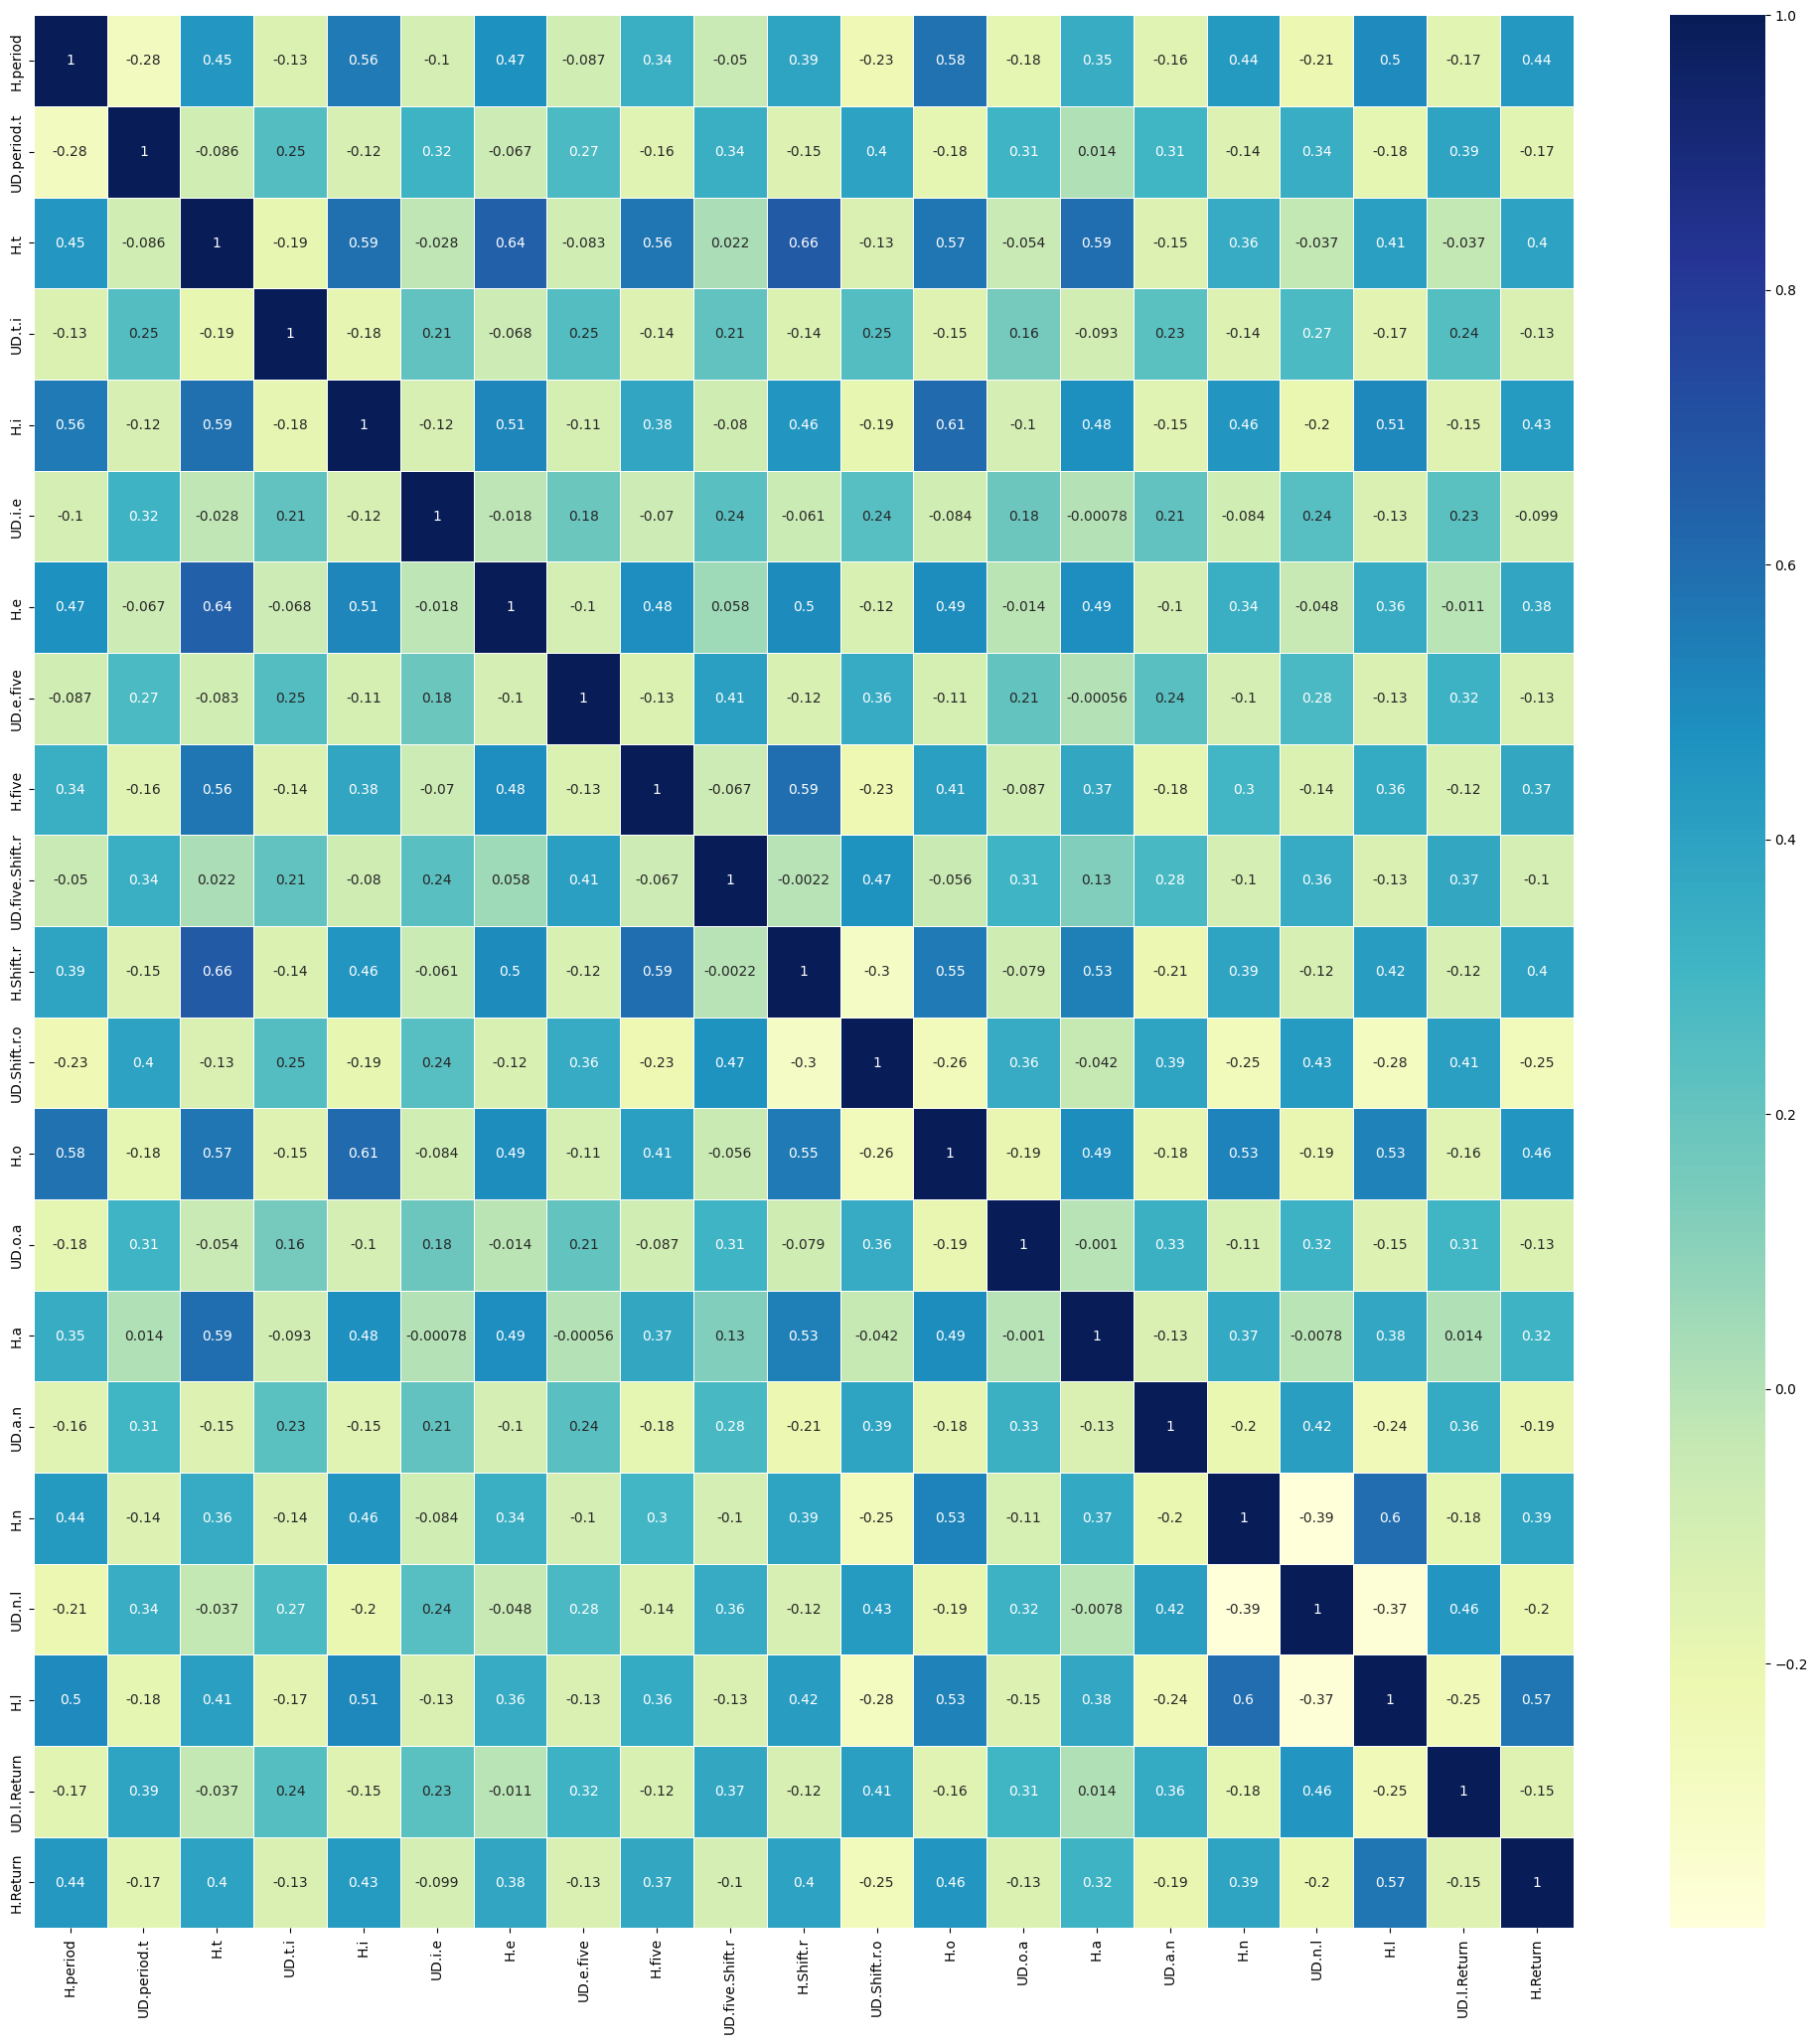

In [ ]:
# check pearson coefficient
pearson_corr = X.corr(method='pearson', numeric_only=False)

#print(pearson_corr)

# plot heatmap of coefficient
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(pearson_corr,
            xticklabels='auto',
            yticklabels='auto',
            cmap='YlGnBu',
            annot=True,
            linewidth=0.5, ax=ax)

plt.show()  # to display the heatmap

#### Visualize ''Hold'' keystroke features

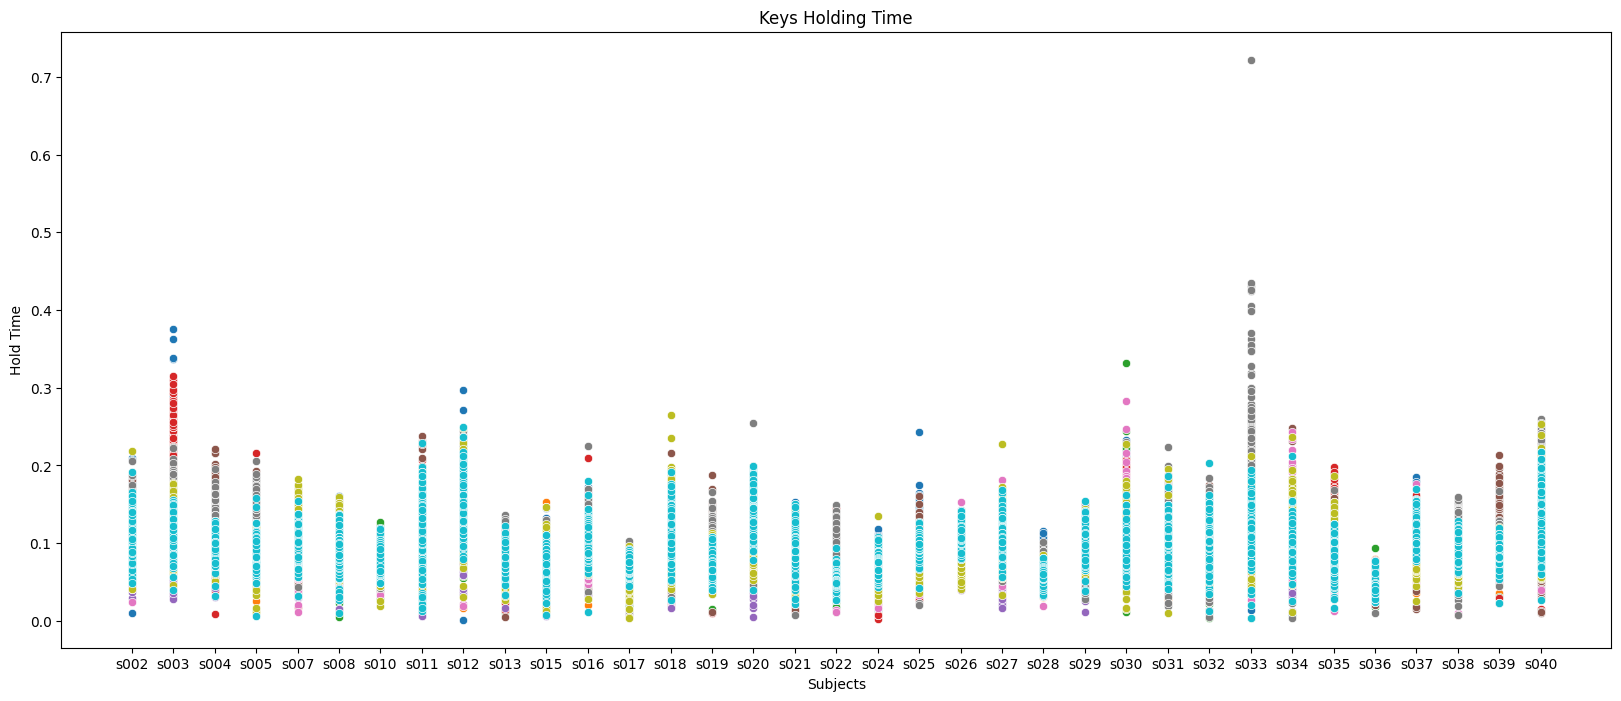

In [ ]:
# Select only the hold times
H_columns = [h for h in feature_columns if h.startswith('H')]

df_bench_grouped = (df_bench.groupby(by='subject', axis=0).count().index[:35])
selected_subjects = df_bench[df_bench['subject'].isin(df_bench_grouped)]

index = selected_subjects['subject']
hold_dataset = selected_subjects[H_columns]
hold_dataset.index = selected_subjects.subject

# creating subplots to overlay the timings
fig, ax = plt.subplots(figsize=(20,8))

for h in H_columns:
    ax = sns.scatterplot(hold_dataset, x=hold_dataset.index, y=h)

ax.set(xlabel="Subjects", ylabel="Hold Time", title='Keys Holding Time')
plt.show()

#### Visualize Key transfer ''Up-to-Down'' keystroke features

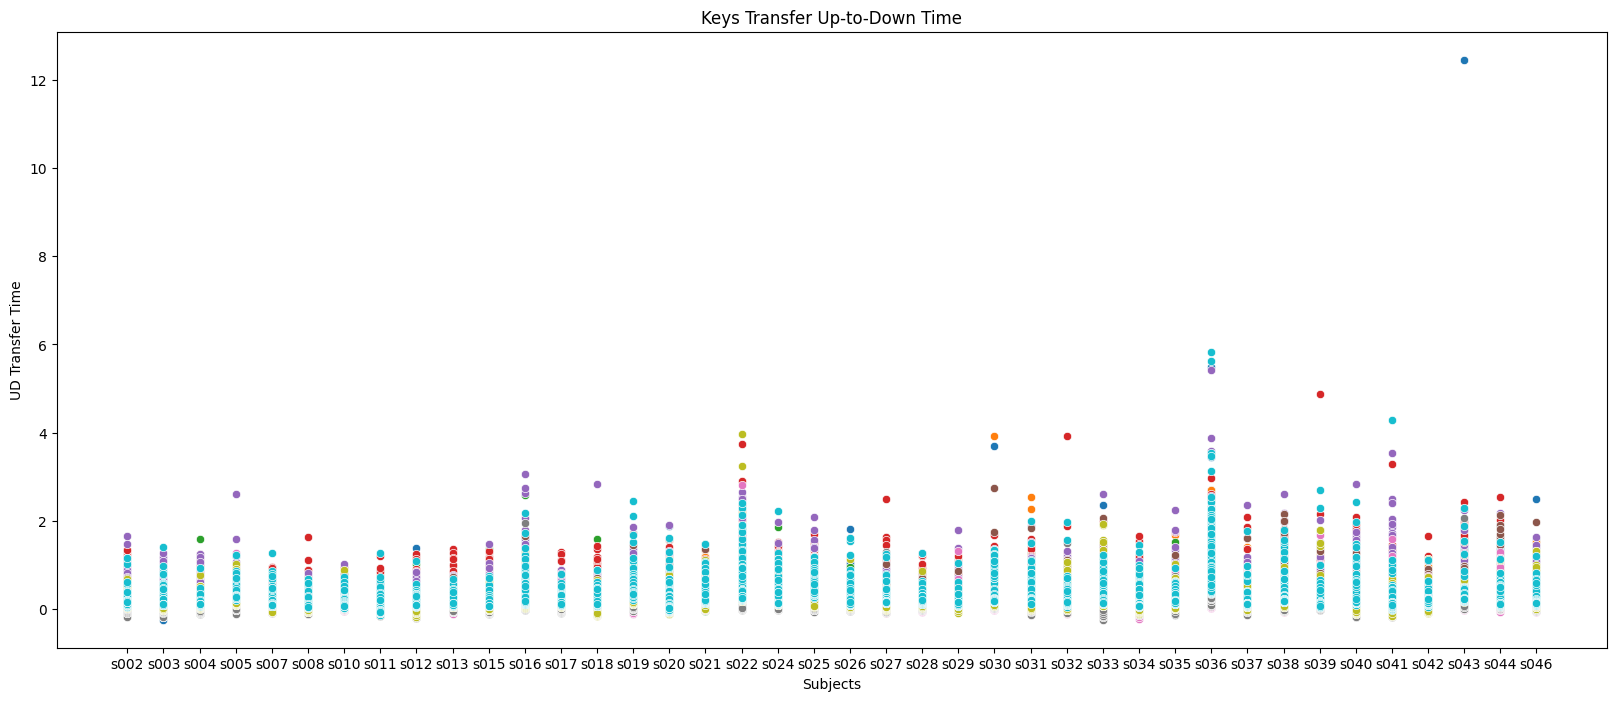

In [ ]:
# Select only the hold times
UD_columns = [h for h in feature_columns if h.startswith('UD')]


df_bench_grouped = (df_bench.groupby(by='subject', axis=0).count().index[:40])

selected_subjects = df_bench[df_bench['subject'].isin(df_bench_grouped)]

index = selected_subjects['subject']
ud_dataset = selected_subjects[UD_columns]
ud_dataset.index = selected_subjects.subject

# creating subplots to overlay the timings
fig, ax = plt.subplots(figsize=(20,8))

for h in UD_columns:
    ax = sns.scatterplot(ud_dataset, x=ud_dataset.index, y=h)

ax.set(xlabel="Subjects", ylabel="UD Transfer Time", title='Keys Transfer Up-to-Down Time')
plt.show()

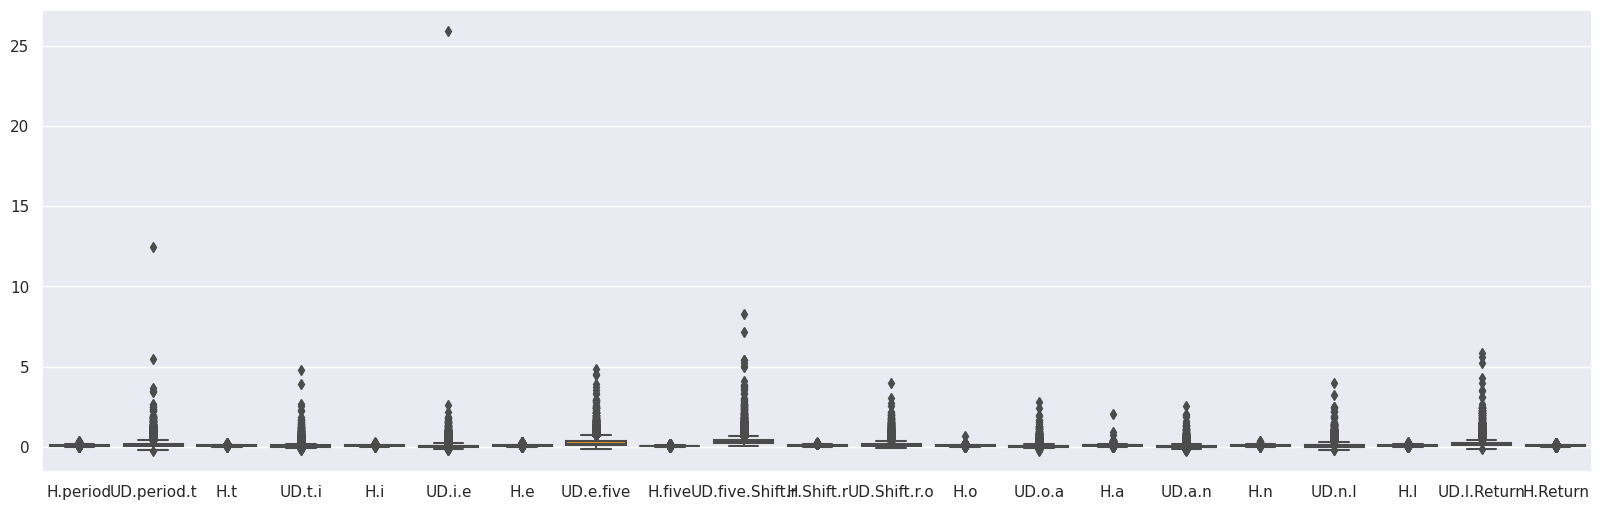

In [ ]:
numerical_columns = X.select_dtypes(include='number')
# Set the default style
sns.set()
plt.figure(figsize=(20, 6))  # Specify width and height in inches
sns.boxplot(data=numerical_columns, color='orange') #palette='Set2')
plt.show()

#### Observation:

All of "Up-to-Down" features have outliers



#### Split dataset for training and testing

In [23]:
# Split data to train and test models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

#### Scale features

In [24]:
# Scale the features
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_train_scaled
X_test_scaled = min_max_scaler.transform(X_test)

# standard_scaler = StandardScaler()
# X_train_scaled = standard_scaler.fit_transform(X_train)
# X_train_scaled
# X_test_scaled = standard_scaler.transform(X_test)

#### Modelling and hyperparameter fine tuning

#### Decision Tree Classifier

 sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42, max_depth=15)
clf_dt.fit(X_train, y_train)
y_train_pred = clf_dt.predict(X_train)
y_test_pred = clf_dt.predict(X_test)

print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_pred)))

# clf_dt_cm = confusion_matrix(y_test, y_test_pred)
# print(clf_dt_cm)
# classification_report(y_test, y_test_pred, digits=2)

Accuracy on training set: 0.83
Accuracy on test set: 0.69


Max depth: 5
Accuracy on training set: 0.29
Accuracy on test set: 0.29
Max depth: 10
Accuracy on training set: 0.62
Accuracy on test set: 0.57
Max depth: 15
Accuracy on training set: 0.83
Accuracy on test set: 0.69
Max depth: 20
Accuracy on training set: 0.95
Accuracy on test set: 0.71
Max depth: 30
Accuracy on training set: 1.00
Accuracy on test set: 0.72
Max depth: 40
Accuracy on training set: 1.00
Accuracy on test set: 0.72


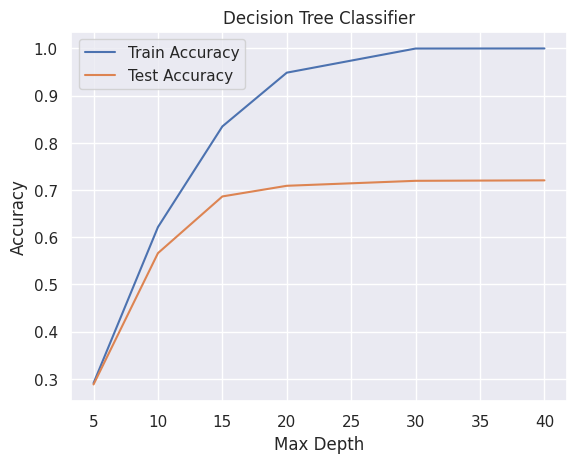

In [ ]:
max_depth = [5, 10, 15, 20, 30, 40]
train_accuracies = []
test_accuracies = []

for n in max_depth:
  clf_dt_scaled = DecisionTreeClassifier(random_state=42,  max_depth=n)
  clf_dt_scaled.fit(X_train_scaled, y_train)
  y_train_pred = clf_dt_scaled.predict(X_train_scaled)
  y_test_pred = clf_dt_scaled.predict(X_test_scaled)
  print("Max depth:", n)
  print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
  print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_pred)))
  train_accuracies.append(accuracy_score(y_train, y_train_pred))
  test_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.title('Decision Tree Classifier')
plt.plot(max_depth, train_accuracies, label='Train Accuracy')
plt.plot(max_depth, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# mlflow.autolog(disable=True)

#### KNN Classifier

sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train.astype(float), y_train)
y_train_pred = clf_knn.predict(X_train.astype(float))
y_test_pred = clf_knn.predict(X_test.astype(float))

print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_pred)))

Accuracy on training set: 0.84
Accuracy on test set: 0.76


K =  1
Accuracy on training set: 1.00
Accuracy on test set: 0.76
K =  2
Accuracy on training set: 0.87
Accuracy on test set: 0.73
K =  3
Accuracy on training set: 0.87
Accuracy on test set: 0.76
K =  4
Accuracy on training set: 0.86
Accuracy on test set: 0.77
K =  5
Accuracy on training set: 0.85
Accuracy on test set: 0.78
K =  6
Accuracy on training set: 0.84
Accuracy on test set: 0.78
K =  7
Accuracy on training set: 0.84
Accuracy on test set: 0.78
K =  8
Accuracy on training set: 0.83
Accuracy on test set: 0.78


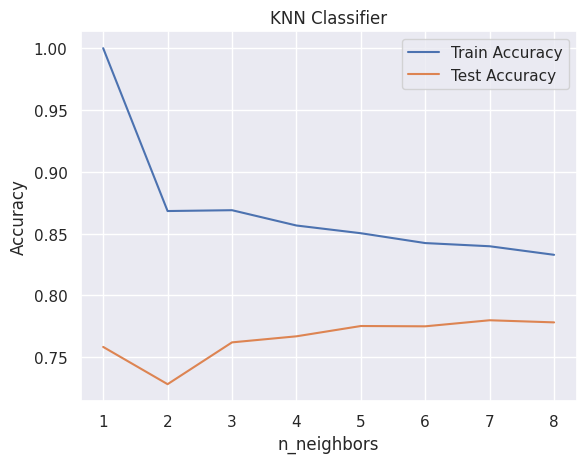

In [ ]:
nn = np.arange(8, dtype=int) + 1
train_accuracies = []
test_accuracies = []

for k in nn:
  clf_knn_scaled = KNeighborsClassifier(n_neighbors=k)
  clf_knn_scaled.fit(X_train_scaled, y_train)
  y_train_pred = clf_knn_scaled.predict(X_train_scaled)
  y_test_pred = clf_knn_scaled.predict(X_test_scaled)
  print("K = ", k)
  print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
  print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_pred)))
  train_accuracies.append(accuracy_score(y_train, y_train_pred))
  test_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.title('KNN Classifier')
plt.plot(nn, train_accuracies, label='Train Accuracy')
plt.plot(nn, test_accuracies, label='Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

n_neighbours 1
n_neighbours 2
n_neighbours 3
n_neighbours 4
n_neighbours 5
n_neighbours 6
n_neighbours 7
Accuracies: [1.0, 0.8682598039215687, 0.8689338235294117, 0.8565563725490196, 0.8503063725490196, 0.8423406862745098, 0.8397671568627451]


Text(0.5, 1.0, 'Cross-Val Accuracy v/s no. of neighbours')

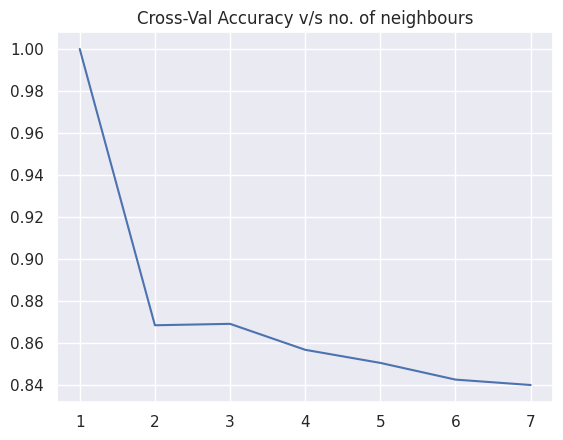

In [ ]:
def getCrossValidationAccuracy(n_neighbours):
    print("n_neighbours", n_neighbours)
    clf_knn_cv = KNeighborsClassifier(n_neighbours)
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    acc = []
#     for train_index, test_index in sss.split(X_train_scaled, y_train):
    clf_knn_cv.fit(X_train_scaled,y_train)
    acc += [accuracy_score(clf_knn_cv.predict(X_train_scaled),y_train)]
    return sum(acc) / len(acc)

allAttemptsAcc = [getCrossValidationAccuracy(i) for i in range(1,8)]

print('Accuracies:', allAttemptsAcc)
sns.lineplot(y=allAttemptsAcc,x=range(1,8)).set_title('Cross-Val Accuracy v/s no. of neighbours')

#### SVM Classifier

sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [ ]:
clf_svc = SVC(random_state=42)
clf_svc.fit(X_train, y_train)

y_train_pred = clf_svc.predict(X_train)
y_test_pred = clf_svc.predict(X_test)

print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_pred)))

Accuracy on training set: 0.85
Accuracy on test set: 0.81


In [ ]:
# SVC Hyperparameter tuning
svc = SVC(random_state=42)
param = {
    'C' : [0.01, 0.1, 1, 10, 20, 30],
    'gamma' : [0.1, 1, 5, 10, 15, 20],
    'kernel': ['rbf', 'poly']
}

clf_svc_gscv_scaled = GridSearchCV(svc, param, cv=10, verbose=2)
clf_svc_gscv_scaled.fit(X_train_scaled, y_train)

print("Best param combinations:", clf_svc_gscv_scaled.best_params_)

# Takes 2.5 hours to complete

Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  23.4s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  20.3s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  18.5s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  19.7s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  18.6s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  21.2s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  19.2s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  18.9s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  19.2s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  18.5s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=  14.6s
[CV] END .....................C=0.01, gamma=0.

In [ ]:
clf_svc_scaled = SVC(C=20, gamma=10, kernel='rbf', random_state=42)
clf_svc_scaled.fit(X_train_scaled, y_train)

y_train_pred = clf_svc_scaled.predict(X_train_scaled)
y_test_pred = clf_svc_scaled.predict(X_test_scaled)

print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_pred)))

Accuracy on training set: 0.99
Accuracy on test set: 0.87


#### Gaussian Naive Bayes Classifier

sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)

In [ ]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

y_train_pred = clf_gnb.predict(X_train)
y_test_pred = clf_gnb.predict(X_test)

print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_pred)))

Accuracy on training set: 0.74
Accuracy on test set: 0.74


In [ ]:
# Define the hyperparameters to tune
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

clf_gnb_scaled = GaussianNB()

# Perform a grid search to find the best hyperparameters
clf_gnb_gscv_scaled = GridSearchCV(clf_gnb_scaled, param_grid, cv=5, verbose=1)
clf_gnb_gscv_scaled.fit(X_train_scaled, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", clf_gnb_gscv_scaled.best_params_)
print("Best accuracy score: ", clf_gnb_gscv_scaled.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters:  {'var_smoothing': 1e-09}
Best accuracy score:  0.7324754901960785


In [ ]:
clf_gnb_scaled = GaussianNB(var_smoothing=1e-9)
clf_gnb_scaled.fit(X_train_scaled, y_train)
y_train_pred = clf_gnb_scaled.predict(X_train_scaled)
y_test_pred = clf_gnb_scaled.predict(X_test_scaled)

print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_pred)))

Accuracy on training set: 0.74
Accuracy on test set: 0.74


#### Logistic Regression Classifier

sklearn.linear_model.LogisticRegressionCV(*, Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=None, verbose=0, refit=True, intercept_scaling=1.0, multi_class='auto', random_state=None, l1_ratios=None)

C=  0.001
Accuracy on training set: 0.16
Accuracy on test set: 0.16
C=  0.01
Accuracy on training set: 0.24
Accuracy on test set: 0.24
C=  0.1
Accuracy on training set: 0.57
Accuracy on test set: 0.58
C=  1
Accuracy on training set: 0.74
Accuracy on test set: 0.74
C=  10
Accuracy on training set: 0.80
Accuracy on test set: 0.79
C=  100
Accuracy on training set: 0.84
Accuracy on test set: 0.83
C=  1000
Accuracy on training set: 0.85
Accuracy on test set: 0.84
C=  10000
Accuracy on training set: 0.86
Accuracy on test set: 0.84


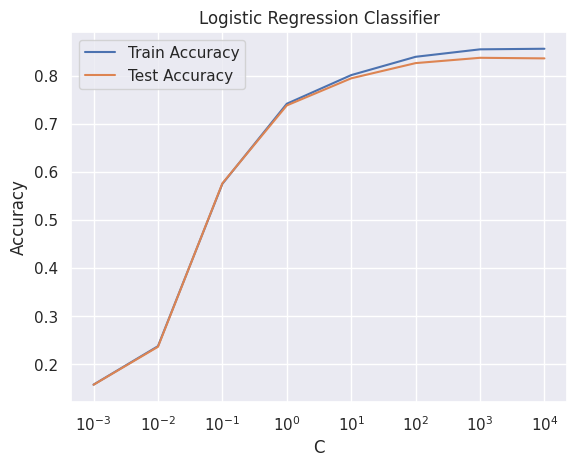

In [ ]:
C = [1e-3, 1e-2, 0.1, 1, 10, 100, 1000, 10000]
train_accuracies = []
test_accuracies = []

for c in C:
  # clf_lr = LogisticRegression(random_state=42, max_iter=5000, solver='lbfgs', penalty='l2', C=c, multi_class='auto')
  clf_lr = LogisticRegression(random_state=42, max_iter=5000, C=c)
  clf_lr.fit(X_train_scaled, y_train)
  y_train_pred = clf_lr.predict(X_train_scaled)
  y_test_pred = clf_lr.predict(X_test_scaled)
  print("C= ", c)
  print("Accuracy on training set: {:.2f}".format(clf_lr.score(X_train_scaled, y_train)))
  print("Accuracy on test set: {:.2f}".format(clf_lr.score(X_test_scaled, y_test)))
  train_accuracies.append(accuracy_score(y_train, y_train_pred))
  test_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.title('Logistic Regression Classifier')
plt.xscale('log')
plt.plot(C, train_accuracies, label='Train Accuracy')
plt.plot(C, test_accuracies, label='Test Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# !mlflow ui

#### Random Forest Classifier

sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)


estimator_count:  50 max_depth:  3
Accuracy on training set: 0.53
Accuracy on test set: 0.52
estimator_count:  50 max_depth:  4
Accuracy on training set: 0.60
Accuracy on test set: 0.59
estimator_count:  50 max_depth:  5
Accuracy on training set: 0.68
Accuracy on test set: 0.67
estimator_count:  50 max_depth:  6
Accuracy on training set: 0.75
Accuracy on test set: 0.73
estimator_count:  100 max_depth:  3
Accuracy on training set: 0.53
Accuracy on test set: 0.53
estimator_count:  100 max_depth:  4
Accuracy on training set: 0.62
Accuracy on test set: 0.62
estimator_count:  100 max_depth:  5
Accuracy on training set: 0.69
Accuracy on test set: 0.67
estimator_count:  100 max_depth:  6
Accuracy on training set: 0.75
Accuracy on test set: 0.73
estimator_count:  200 max_depth:  3
Accuracy on training set: 0.54
Accuracy on test set: 0.54
estimator_count:  200 max_depth:  4
Accuracy on training set: 0.62
Accuracy on test set: 0.61
estimator_count:  200 max_depth:  5
Accuracy on training set: 0.

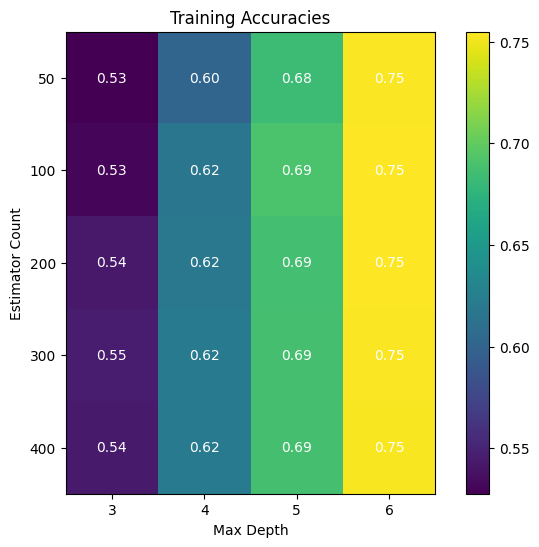

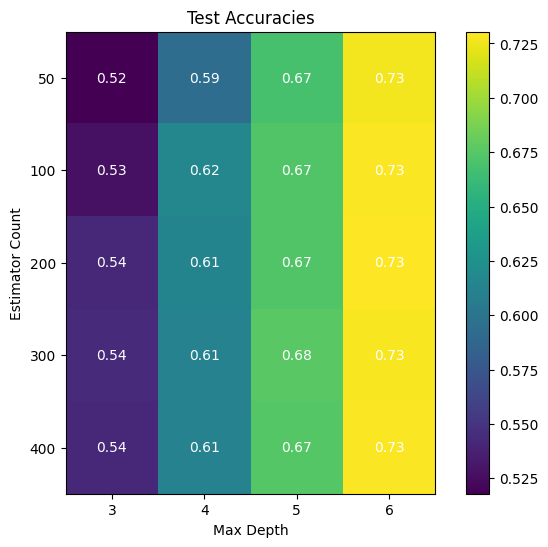

In [ ]:
estimator_count = [50, 100, 200, 300, 400]
max_depth = [3, 4, 5, 6]
train_accuracies = np.zeros((len(estimator_count), len(max_depth)))
test_accuracies = np.zeros((len(estimator_count), len(max_depth)))

for i, e in enumerate(estimator_count):
  for j, d in enumerate(max_depth):
    clf_rf_scaled = RandomForestClassifier(random_state=42, n_estimators=e, max_depth=d)
    clf_rf_scaled.fit(X_train_scaled, y_train)
    y_train_pred = clf_rf_scaled.predict(X_train_scaled)
    y_test_pred = clf_rf_scaled.predict(X_test_scaled)
    print("estimator_count: ", e, "max_depth: ", d)
    print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
    print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_pred)))
    train_accuracies[i, j] = accuracy_score(y_train, y_train_pred)
    test_accuracies[i, j] = accuracy_score(y_test, y_test_pred)

# Plotting the training accuracies
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(train_accuracies, cmap='viridis')
ax.set_xticks(np.arange(len(max_depth)))
ax.set_yticks(np.arange(len(estimator_count)))
ax.set_xticklabels(max_depth)
ax.set_yticklabels(estimator_count)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Estimator Count')
ax.set_title('Training Accuracies')
for i in range(len(estimator_count)):
    for j in range(len(max_depth)):
        text = ax.text(j, i, "{:.2f}".format(train_accuracies[i, j]), ha='center', va='center', color='w')
plt.colorbar(im, ax=ax)
plt.show()

# Plotting the test accuracies
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(test_accuracies, cmap='viridis')
ax.set_xticks(np.arange(len(max_depth)))
ax.set_yticks(np.arange(len(estimator_count)))
ax.set_xticklabels(max_depth)
ax.set_yticklabels(estimator_count)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Estimator Count')
ax.set_title('Test Accuracies')
for i in range(len(estimator_count)):
    for j in range(len(max_depth)):
        text = ax.text(j, i, "{:.2f}".format(test_accuracies[i, j]), ha='center', va='center', color='w')
plt.colorbar(im, ax=ax)
plt.show()


### Define base estimators for ensemble learning

In [ ]:
# Define base estimators
log_clf = LogisticRegression(solver="lbfgs", random_state=42, max_iter=10000)
knn_clf = KNeighborsClassifier(n_neighbors=3)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

estimators = [('lr', log_clf), ('knn', knn_clf), ('rf', rf_clf), ('svm', svm_clf)]

#### Ada Boost Classifier

sklearn.ensemble.AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None, base_estimator='deprecated')

In [ ]:
clf_ada = AdaBoostClassifier(estimator=log_clf, n_estimators=100, random_state=42)
clf_ada.fit(X_train, y_train)
y_train_pred = clf_ada.predict(X_train)
y_test_pred = clf_ada.predict(X_test)

print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_pred)))

Accuracy on training set: 0.32
Accuracy on test set: 0.31


In [ ]:
clf_ada_scaled = AdaBoostClassifier(estimator=log_clf,  n_estimators=100, random_state=42)
clf_ada_scaled.fit(X_train_scaled, y_train)
y_train_pred = clf_ada_scaled.predict(X_train_scaled)
y_test_pred = clf_ada_scaled.predict(X_test_scaled)

print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_pred)))

Accuracy on training set: 0.35
Accuracy on test set: 0.35


#### Gradient Boosting Classifier

'sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse',
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,
random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)'

In [ ]:
clf_gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1,random_state=42) #default base is Decision Tree Classifier
clf_gb.fit(X_train, y_train)
y_train_pred = clf_gb.predict(X_train)
y_test_pred = clf_gb.predict(X_test)

print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_pred)))

Accuracy on training set: 1.00
Accuracy on test set: 0.93


      Iter       Train Loss   Remaining Time 
         1           2.8197           26.39m
         2           2.5636           22.23m
         3           2.3668           20.79m
         4           2.2081           19.47m
         5           2.0718           19.39m
         6           1.9551           18.78m
         7           1.8534           18.24m
         8           1.7599           18.33m
         9           1.6757           17.92m
        10           1.5991           17.62m
        11           1.5286           17.64m
        12           1.4635           17.34m
        13           1.4020           17.24m
        14           1.3454           17.12m
        15           1.2922           16.88m
        16           1.2419           16.88m
        17           1.1946           16.69m
        18           1.1503           16.49m
        19           1.1088           16.51m
        20           1.0680           16.33m
        21           1.0315           16.41m
        2

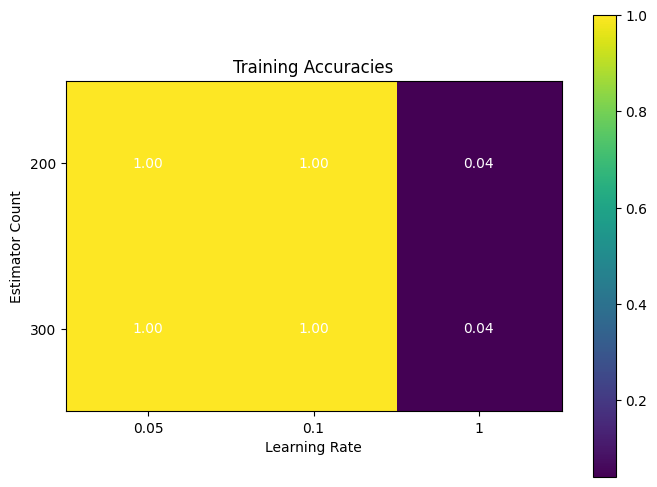

NameError: ignored

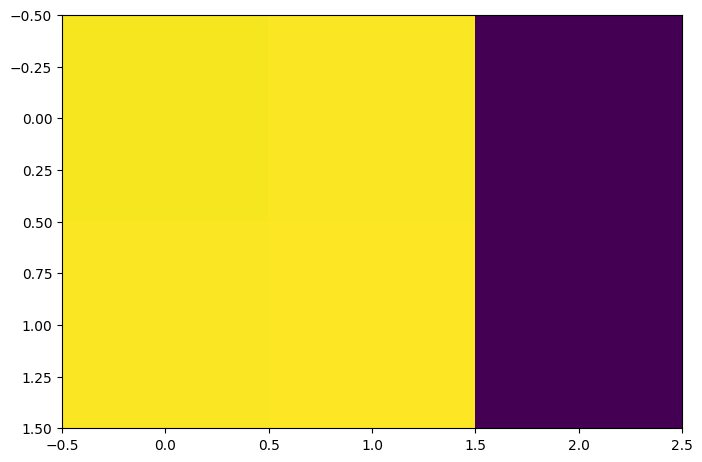

In [25]:
estimator_count = [200, 300]
learning_rate = [0.05, 0.1, 1]
train_accuracies = np.zeros((len(estimator_count), len(learning_rate)))
test_accuracies = np.zeros((len(estimator_count), len(learning_rate)))

for i, e in enumerate(estimator_count):
  for j, l in enumerate(learning_rate):
    clf_gb_scaled = GradientBoostingClassifier(random_state=42, n_estimators=e, learning_rate=l, verbose=2)
    clf_gb_scaled.fit(X_train_scaled, y_train)
    y_train_pred = clf_gb_scaled.predict(X_train_scaled)
    y_test_pred = clf_gb_scaled.predict(X_test_scaled)
    print("estimator_count: ", e, "learning_rate: ", l)
    print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
    print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_pred)))
    train_accuracies[i, j] = accuracy_score(y_train, y_train_pred)
    test_accuracies[i, j] = accuracy_score(y_test, y_test_pred)

# Plotting the training accuracies
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(train_accuracies, cmap='viridis')
ax.set_xticks(np.arange(len(learning_rate)))
ax.set_yticks(np.arange(len(estimator_count)))
ax.set_xticklabels(learning_rate)
ax.set_yticklabels(estimator_count)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Estimator Count')
ax.set_title('Training Accuracies')
for i in range(len(estimator_count)):
    for j in range(len(learning_rate)):
        text = ax.text(j, i, "{:.2f}".format(train_accuracies[i, j]), ha='center', va='center', color='w')
plt.colorbar(im, ax=ax)
plt.show()

# Plotting the test accuracies
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(test_accuracies, cmap='viridis')
ax.set_xticks(np.arange(len(max_depth)))
ax.set_yticks(np.arange(len(estimator_count)))
ax.set_xticklabels(learning_rate)
ax.set_yticklabels(estimator_count)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Estimator Count')
ax.set_title('Test Accuracies')
for i in range(len(estimator_count)):
    for j in range(len(learning_rate)):
        text = ax.text(j, i, "{:.2f}".format(test_accuracies[i, j]), ha='center', va='center', color='w')
plt.colorbar(im, ax=ax)
plt.show()


In [ ]:
# Instantiate sklearn Gradient Boost Ensemble model
# clf = GradientBoostingClassifier(random_state=42)

# # Run grid search
# param_grid = {'n_estimators': [200, 300],
#               'learning_rate': [0.01, 0.1, 1, 10],
#               'subsample': [0.8, 0.9, 1.0]}

# grid = GridSearchCV(clf, param_grid=param_grid, cv=10, verbose=2)
# grid.fit(X_train_scaled, y_train)

# # Fit the best model
# best_clf = grid.best_estimator_

# # Plot partial dependence curves
# features = ['feature_1', 'feature_2', 'feature_3']
# fig, axs = plot_partial_dependence(best_clf, X_train_scaled, features,
#                                    n_jobs=-1, grid_resolution=50)
# fig.suptitle('Partial dependence plots')

#### Ensemble learning

In [ ]:
# Define base estimators
log_clf = LogisticRegression(solver="lbfgs", random_state=42, max_iter=10000)
knn_clf = KNeighborsClassifier(n_neighbors=3)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

estimators = [('lr', log_clf), ('knn', knn_clf), ('rf', rf_clf), ('svm', svm_clf)]

# Define Voting and StackingClassifiers
voting_clf = VotingClassifier(estimators=estimators, voting='soft')
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())

# Train the classifiers and Calculate accuracy scores using cross-validation
clf_names = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'Voting', 'Stacking']
clf_list = [log_clf, knn_clf, rf_clf, svm_clf, voting_clf, stacking_clf]
clf_scores = []
for clf in clf_list:
    print(clf.__class__.__name__)
    scores = cross_val_score(clf, X, y, cv=10, verbose=2)
    clf_scores.append([np.mean(scores), np.std(scores)])

# Print the accuracy scores in a table with 4 decimal digits
clf_scores_formatted = [[score[0], score[1]] for score in clf_scores]
clf_scores_formatted = [[f"{score[0]:.3f}", f"{score[1]:.3f}"] for score in clf_scores_formatted]
print(tabulate(clf_scores_formatted, headers=['Classifier', 'Mean Accuracy', 'Std Deviation'], tablefmt='grid', showindex=clf_names))

LogisticRegression
[CV] END .................................................... total time=   8.3s
[CV] END .................................................... total time=   7.4s
[CV] END .................................................... total time=   4.3s
[CV] END .................................................... total time=   5.0s
[CV] END .................................................... total time=   5.9s
[CV] END .................................................... total time=   4.5s
[CV] END .................................................... total time=   6.0s
[CV] END .................................................... total time=   5.4s
[CV] END .................................................... total time=   4.4s
[CV] END .................................................... total time=   6.4s
KNeighborsClassifier
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total t

## 2.2. Analyze Keystroke dynamics with hybrid data set

### Load hybrid data set

In [ ]:
# Load data and perform Exploratory Data Analysis (EDA)

if is_running_in_colab():
  from google.colab import drive
  drive.mount('/content/drive')
  data_dir_path='/content/drive/My Drive/NYP_AI/ITI105/AL_JA/'

  # df = pd.read_csv(data_dir_path + 'Hybrid-StrongPasswordData.csv')
  # df_hybrid = pd.concat([df['subject'], df.iloc[:,1:].astype('float32')], axis=1, sort=False)
  new_df = pd.read_csv(data_dir_path + 'Allen-keystroke_combined.csv')

if is_running_in_jupyter_notebook():
  # df = pd.read_csv('Hybrid-StrongPasswordData.csv')
  # df_hybrid = pd.concat([df['subject'], df.iloc[:,1:].astype('float32')], axis=1, sort=False)
  new_df = pd.read_csv('Allen-keystroke_combined.csv')

# print("Data shape (rows, cols):",   df_hybrid.shape)
# df_hybrid.head()

# Get the dataframe for feature columns only
# Conversion from millisec to second
new_features = new_df.drop(['User','Session', 'Sequence'], axis=1) / 1000.0
new_target = new_df['User']

new_features

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,H.period,UD.period.t,H.t,UD.t.i,H.i,UD.i.e,H.e,UD.e.five,H.five,UD.five.Shift.r,...,UD.Shift.r.o,H.o,UD.o.a,H.a,UD.a.n,H.n,UD.n.l,H.l,UD.l.Return,H.Return
0,0.131,0.131,0.091,0.063,0.091,0.100,0.101,0.161,0.115,0.321,...,0.003,0.088,0.090,0.132,0.003,0.077,0.154,0.071,0.130,0.071
1,0.131,0.134,0.082,0.070,0.071,0.019,0.091,0.144,0.071,0.342,...,0.130,0.082,0.059,0.112,0.080,0.074,0.180,0.072,0.181,0.073
2,0.121,0.115,0.081,0.070,0.071,0.019,0.091,0.265,0.101,0.347,...,0.121,0.080,0.060,0.125,0.060,0.062,0.170,0.062,0.193,0.071
3,0.121,0.130,0.092,0.073,0.081,0.029,0.081,0.191,0.124,0.292,...,0.123,0.081,0.080,0.111,0.070,0.071,0.164,0.081,0.090,0.081
4,0.122,0.090,0.091,0.063,0.081,0.040,0.101,0.161,0.095,0.312,...,0.144,0.090,0.050,0.111,0.030,0.082,0.143,0.051,0.150,0.051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,0.144,-0.003,0.118,0.080,0.092,0.069,0.092,0.137,0.091,0.292,...,0.070,0.091,0.071,0.120,0.050,0.088,0.172,0.101,0.120,0.072
410,0.132,0.049,0.102,0.107,0.091,0.090,0.112,0.127,0.091,0.334,...,0.110,0.082,0.069,0.082,0.070,0.098,0.150,0.081,0.131,0.061
411,0.123,0.120,0.098,0.070,0.102,0.060,0.111,0.137,0.112,0.312,...,0.070,0.112,0.029,0.112,0.060,0.098,0.142,0.081,0.101,0.091
412,0.121,0.161,0.111,0.051,0.088,0.060,0.122,0.111,0.101,0.289,...,0.101,0.098,0.070,0.101,0.050,0.102,0.157,0.071,0.120,0.062


In [ ]:
# Loading benchmark dataset and only taking data from first 10 subjects
df_bench2 = pd.read_csv(data_dir_path + 'DSL-StrongPasswordData.csv')
selected_subjects = (df_bench2.groupby(by='subject', axis=0).count().index[:10])
selected_dataset = df_bench2[df_bench2['subject'].isin(selected_subjects)]

# The DD and UD timings of each key have been showed to be highly correlated to each other
# in a separate analysis. Hence, we will drop all features starting with 'DD'
all_features = selected_dataset.columns[3:34]
benchmark_features = [x for x in all_features if not x.startswith('DD')]
benchmark_target = selected_dataset['subject']

In [ ]:
# Get a copy of dataset with selected feature columns
df = selected_dataset[benchmark_features].copy()

# Concatenate both DataFrame for feature columns
df = pd.concat([df, new_features])

# Concatenate both target columns
df_target = pd.concat([benchmark_target, new_target ])

# check for invalid/missing data
df.info()
df_hybrid = pd.concat([df_target, df], axis=1)
df_hybrid.rename(columns={0: 'subject'}, inplace=True)
df_hybrid

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4414 entries, 0 to 413
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   H.period         4414 non-null   float64
 1   UD.period.t      4414 non-null   float64
 2   H.t              4414 non-null   float64
 3   UD.t.i           4414 non-null   float64
 4   H.i              4414 non-null   float64
 5   UD.i.e           4414 non-null   float64
 6   H.e              4414 non-null   float64
 7   UD.e.five        4414 non-null   float64
 8   H.five           4414 non-null   float64
 9   UD.five.Shift.r  4414 non-null   float64
 10  H.Shift.r        4414 non-null   float64
 11  UD.Shift.r.o     4414 non-null   float64
 12  H.o              4414 non-null   float64
 13  UD.o.a           4414 non-null   float64
 14  H.a              4414 non-null   float64
 15  UD.a.n           4414 non-null   float64
 16  H.n              4414 non-null   float64
 17  UD.n.l         

,subject,H.period,UD.period.t,H.t,UD.t.i,H.i,UD.i.e,H.e,UD.e.five,H.five,...,UD.Shift.r.o,H.o,UD.o.a,H.a,UD.a.n,H.n,UD.n.l,H.l,UD.l.Return,H.Return
0,s002,0.1491,0.2488,0.1069,0.0605,0.1169,0.1043,0.1417,1.0468,0.1146,...,0.6523,0.1016,0.1120,0.1349,0.0135,0.0932,0.2583,0.1338,0.2171,0.0742
1,s002,0.1111,0.2340,0.0694,0.0589,0.0908,0.0449,0.0829,1.1141,0.0689,...,0.6307,0.1066,0.0618,0.1412,0.1146,0.1146,0.1496,0.0839,0.1917,0.0747
2,s002,0.1328,0.0744,0.0731,0.0560,0.0821,0.0721,0.0808,0.9600,0.0892,...,0.5741,0.1365,0.1566,0.1621,0.0711,0.1172,0.1533,0.1085,0.1762,0.0945
3,s002,0.1291,0.1224,0.1059,0.1436,0.1040,0.0998,0.0900,0.9656,0.0913,...,0.6096,0.0956,0.0574,0.1457,0.0172,0.0866,0.1475,0.0845,0.2387,0.0813
4,s002,0.1249,0.1068,0.0895,0.0781,0.0903,0.0686,0.0805,0.7824,0.0742,...,0.6389,0.0430,0.1545,0.1312,0.0270,0.0884,0.1633,0.0903,0.1614,0.0818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,Allen,0.1440,-0.0030,0.1180,0.0800,0.0920,0.0690,0.0920,0.1370,0.0910,...,0.0700,0.0910,0.0710,0.1200,0.0500,0.0880,0.1720,0.1010,0.1200,0.0720
410,Allen,0.1320,0.0490,0.1020,0.1070,0.0910,0.0900,0.1120,0.1270,0.0910,...,0.1100,0.0820,0.0690,0.0820,0.0700,0.0980,0.1500,0.0810,0.1310,0.0610
411,Allen,0.1230,0.1200,0.0980,0.0700,0.1020,0.0600,0.1110,0.1370,0.1120,...,0.0700,0.1120,0.0290,0.1120,0.0600,0.0980,0.1420,0.0810,0.1010,0.0910
412,Allen,0.1210,0.1610,0.1110,0.0510,0.0880,0.0600,0.1220,0.1110,0.1010,...,0.1010,0.0980,0.0700,0.1010,0.0500,0.1020,0.1570,0.0710,0.1200,0.0620


#### Perform Exploratory Data Analyzis

In [ ]:
# view dataset information
df_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4414 entries, 0 to 413
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject          4414 non-null   object 
 1   H.period         4414 non-null   float64
 2   UD.period.t      4414 non-null   float64
 3   H.t              4414 non-null   float64
 4   UD.t.i           4414 non-null   float64
 5   H.i              4414 non-null   float64
 6   UD.i.e           4414 non-null   float64
 7   H.e              4414 non-null   float64
 8   UD.e.five        4414 non-null   float64
 9   H.five           4414 non-null   float64
 10  UD.five.Shift.r  4414 non-null   float64
 11  H.Shift.r        4414 non-null   float64
 12  UD.Shift.r.o     4414 non-null   float64
 13  H.o              4414 non-null   float64
 14  UD.o.a           4414 non-null   float64
 15  H.a              4414 non-null   float64
 16  UD.a.n           4414 non-null   float64
 17  H.n            

In [ ]:
# view dataset information
df_hybrid.describe()

,H.period,UD.period.t,H.t,UD.t.i,H.i,UD.i.e,H.e,UD.e.five,H.five,UD.five.Shift.r,...,UD.Shift.r.o,H.o,UD.o.a,H.a,UD.a.n,H.n,UD.n.l,H.l,UD.l.Return,H.Return
count,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,...,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000
mean,0.103537,0.085167,0.097508,0.052595,0.093496,0.042447,0.098172,0.204563,0.088596,0.278054,...,0.084739,0.098780,0.036351,0.118162,0.010791,0.096484,0.071377,0.095993,0.154884,0.093872
std,0.032388,0.103326,0.027631,0.062260,0.025042,0.093934,0.034810,0.185584,0.023013,0.139859,...,0.083128,0.021320,0.057730,0.031025,0.060925,0.029204,0.096781,0.026832,0.115807,0.028092
min,0.001400,-0.235800,0.009300,-0.162100,0.005000,-0.160000,0.008200,-0.150500,0.006100,0.085600,...,-0.080300,0.011900,-0.097100,0.026700,-0.194500,0.010900,-0.175800,0.006100,-0.124500,0.011100
25%,0.081800,0.029000,0.075000,0.019000,0.076000,-0.003200,0.075500,0.109500,0.071000,0.193500,...,0.037200,0.084300,0.001200,0.101000,-0.022625,0.076150,-0.012925,0.078900,0.102000,0.074000
50%,0.096600,0.063800,0.092700,0.043600,0.087900,0.029000,0.091600,0.142650,0.088700,0.249250,...,0.065200,0.094300,0.026500,0.116700,0.004450,0.090300,0.069400,0.091400,0.125500,0.088400
75%,0.118725,0.117075,0.117775,0.074700,0.106700,0.069000,0.112700,0.241500,0.104000,0.315850,...,0.105900,0.110175,0.062400,0.136675,0.037800,0.115100,0.134600,0.106400,0.177875,0.109000
max,0.376100,1.393200,0.220100,0.928600,0.244500,1.597600,0.315400,1.647000,0.195000,2.610800,...,0.932000,0.206100,1.272300,0.244200,0.857400,0.248600,1.493000,0.248900,1.418800,0.242800


#### Feature selection and data pre-processing for training and testing

In [ ]:
df_hybrid.columns

Index(['subject', 'H.period', 'UD.period.t', 'H.t', 'UD.t.i', 'H.i', 'UD.i.e',
       'H.e', 'UD.e.five', 'H.five', 'UD.five.Shift.r', 'H.Shift.r',
       'UD.Shift.r.o', 'H.o', 'UD.o.a', 'H.a', 'UD.a.n', 'H.n', 'UD.n.l',
       'H.l', 'UD.l.Return', 'H.Return'],
      dtype='object')

In [ ]:
# Drop columns (features) that have "DD." in their name as these columns
# are sum of their corresponding 'Hold' and 'Up-Down' column values
col_names = [item for item in df_hybrid.columns if "DD." not in item] # regex='^(?!.*DD).*'
print(col_names)
df_hybrid = df_hybrid[col_names]
print(df_hybrid.shape)
df_hybrid.head()

['subject', 'H.period', 'UD.period.t', 'H.t', 'UD.t.i', 'H.i', 'UD.i.e', 'H.e', 'UD.e.five', 'H.five', 'UD.five.Shift.r', 'H.Shift.r', 'UD.Shift.r.o', 'H.o', 'UD.o.a', 'H.a', 'UD.a.n', 'H.n', 'UD.n.l', 'H.l', 'UD.l.Return', 'H.Return']
(4414, 22)


,subject,H.period,UD.period.t,H.t,UD.t.i,H.i,UD.i.e,H.e,UD.e.five,H.five,...,UD.Shift.r.o,H.o,UD.o.a,H.a,UD.a.n,H.n,UD.n.l,H.l,UD.l.Return,H.Return
0,s002,0.1491,0.2488,0.1069,0.0605,0.1169,0.1043,0.1417,1.0468,0.1146,...,0.6523,0.1016,0.1120,0.1349,0.0135,0.0932,0.2583,0.1338,0.2171,0.0742
1,s002,0.1111,0.2340,0.0694,0.0589,0.0908,0.0449,0.0829,1.1141,0.0689,...,0.6307,0.1066,0.0618,0.1412,0.1146,0.1146,0.1496,0.0839,0.1917,0.0747
2,s002,0.1328,0.0744,0.0731,0.0560,0.0821,0.0721,0.0808,0.9600,0.0892,...,0.5741,0.1365,0.1566,0.1621,0.0711,0.1172,0.1533,0.1085,0.1762,0.0945
3,s002,0.1291,0.1224,0.1059,0.1436,0.1040,0.0998,0.0900,0.9656,0.0913,...,0.6096,0.0956,0.0574,0.1457,0.0172,0.0866,0.1475,0.0845,0.2387,0.0813
4,s002,0.1249,0.1068,0.0895,0.0781,0.0903,0.0686,0.0805,0.7824,0.0742,...,0.6389,0.0430,0.1545,0.1312,0.0270,0.0884,0.1633,0.0903,0.1614,0.0818


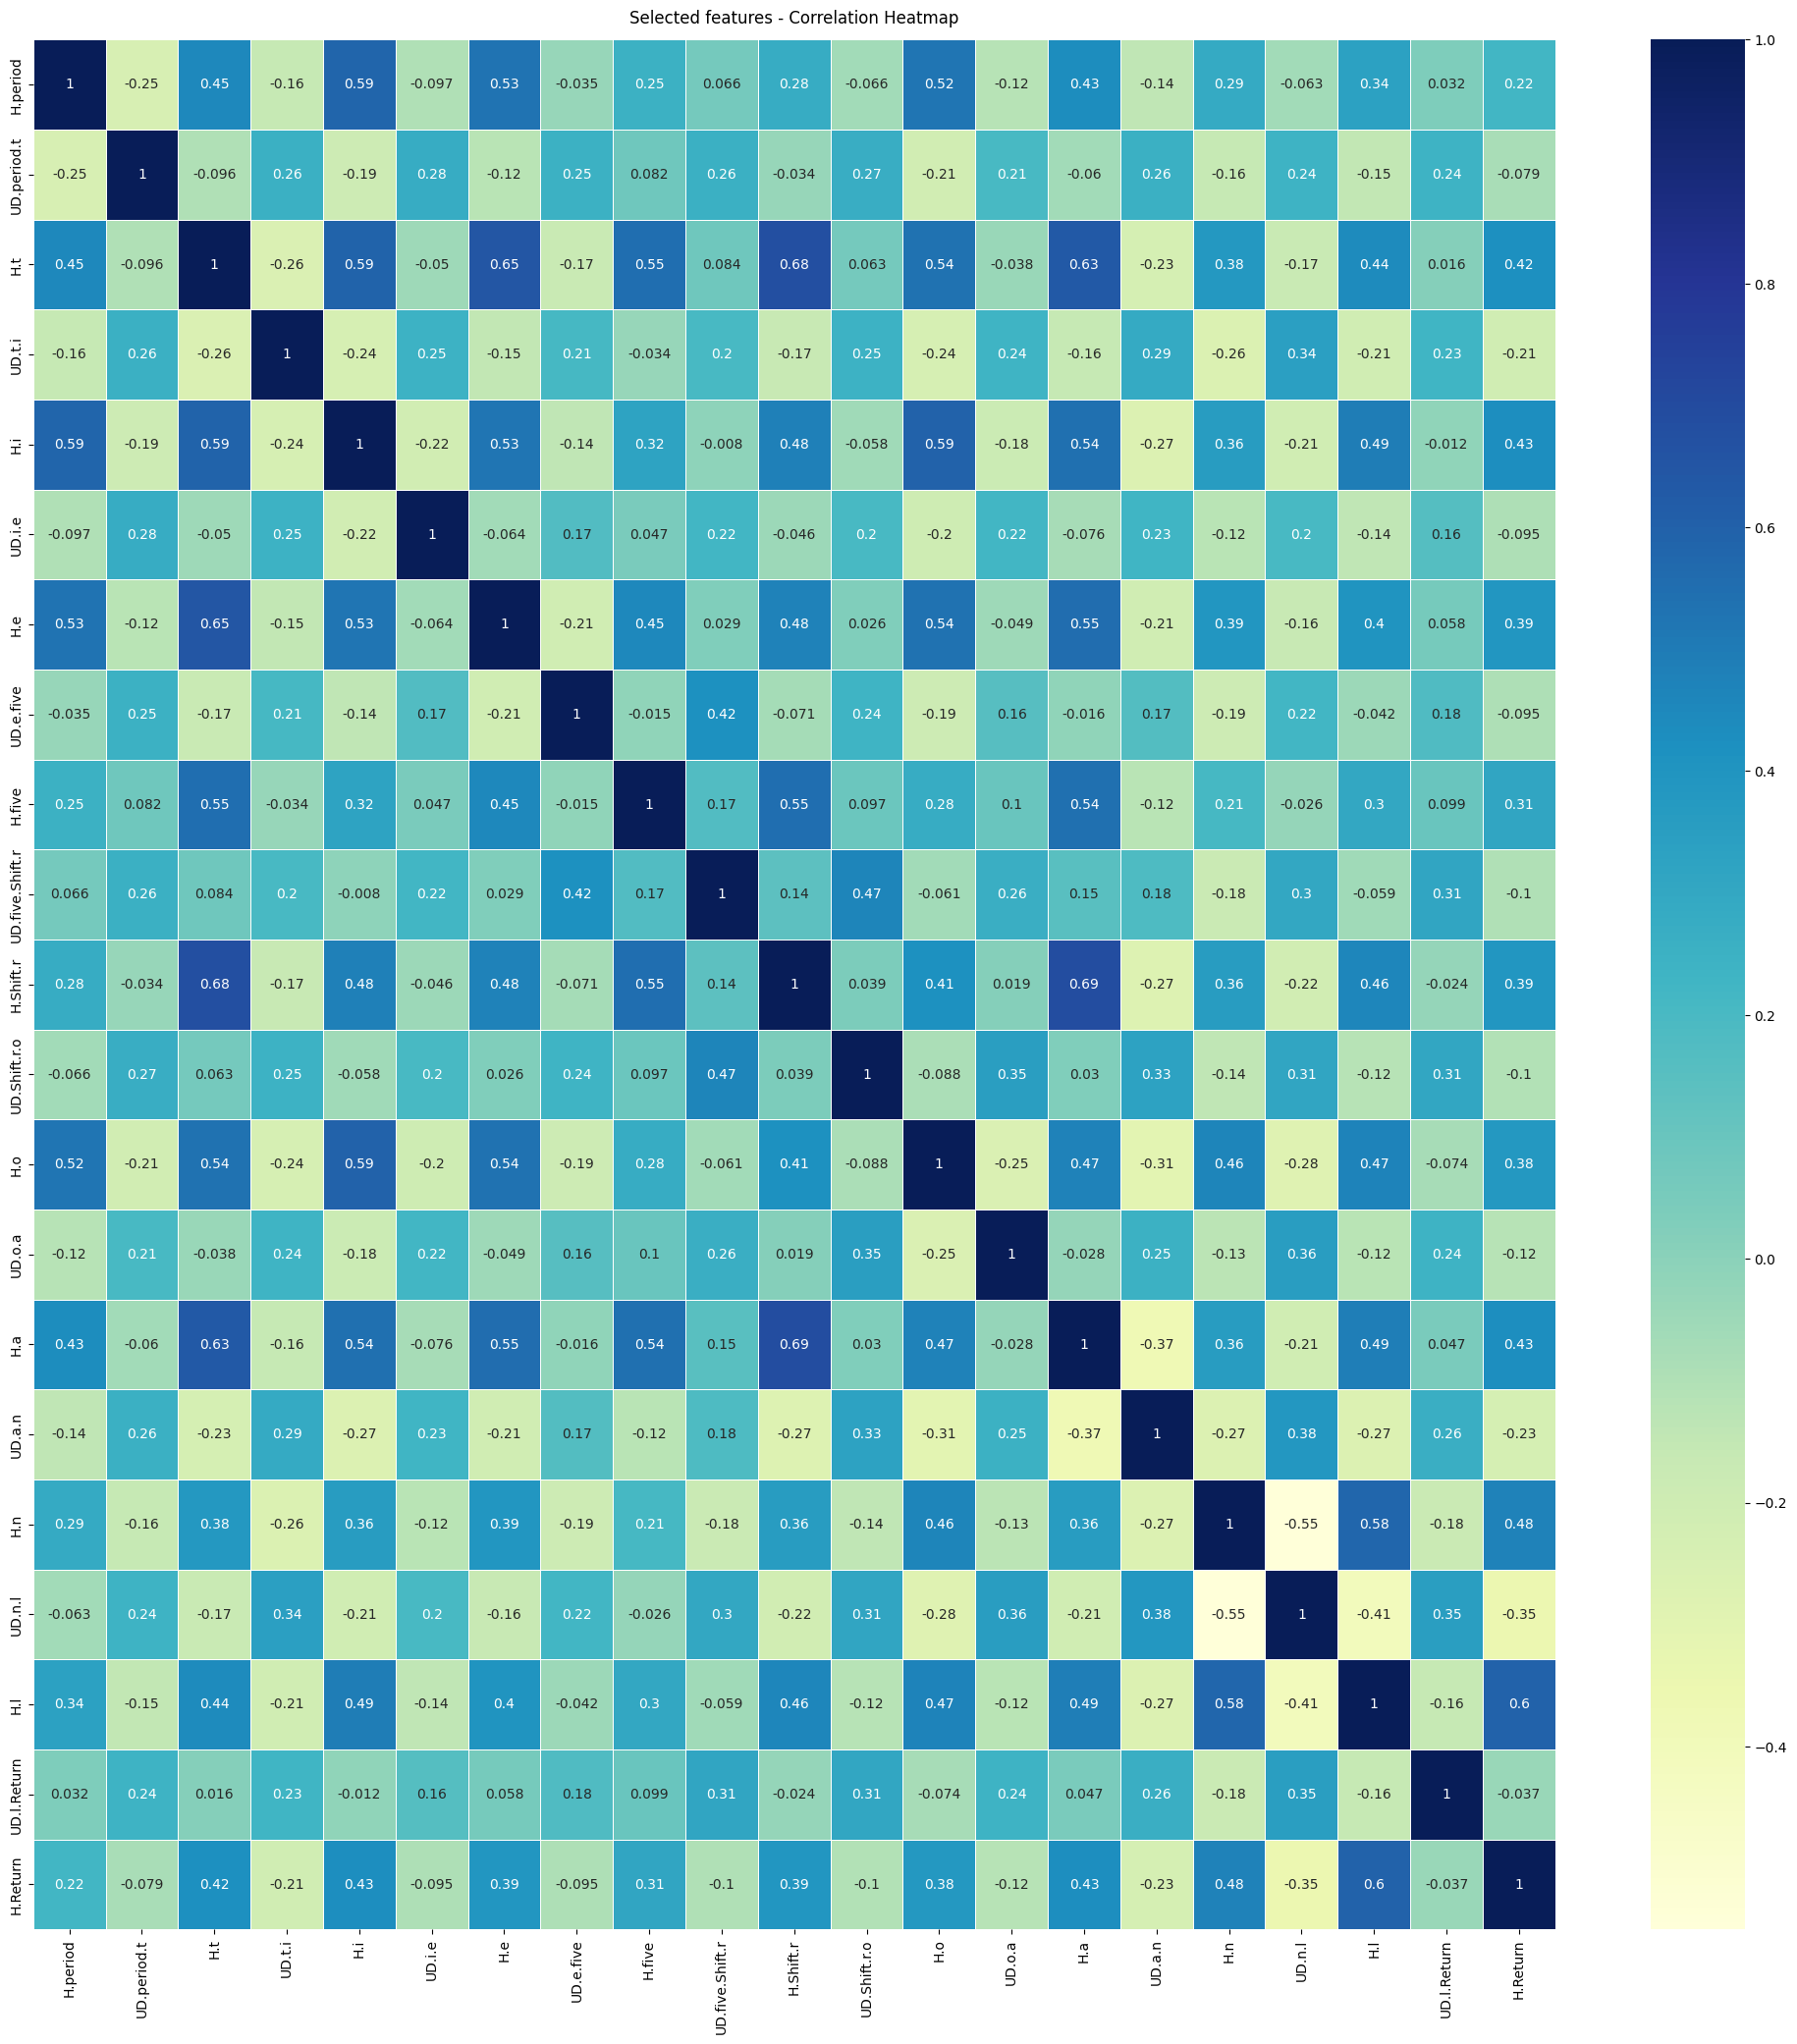

In [ ]:
# check pearson coefficient
features = df_hybrid.drop(columns=['subject'])

pearson_corr = features.corr(method='pearson', numeric_only=False)

#print(pearson_corr)

# plot heatmap of coefficient
fig, ax = plt.subplots(figsize=(25,25))
heatmap = sns.heatmap(pearson_corr,
            xticklabels='auto',
            yticklabels='auto',
            cmap='YlGnBu',
            annot=True,
            linewidth=0.5, ax=ax)
heatmap.set_title('Selected features - Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

plt.show()  # to display the heatmap

#### Visualize ''Hold'' keystroke features

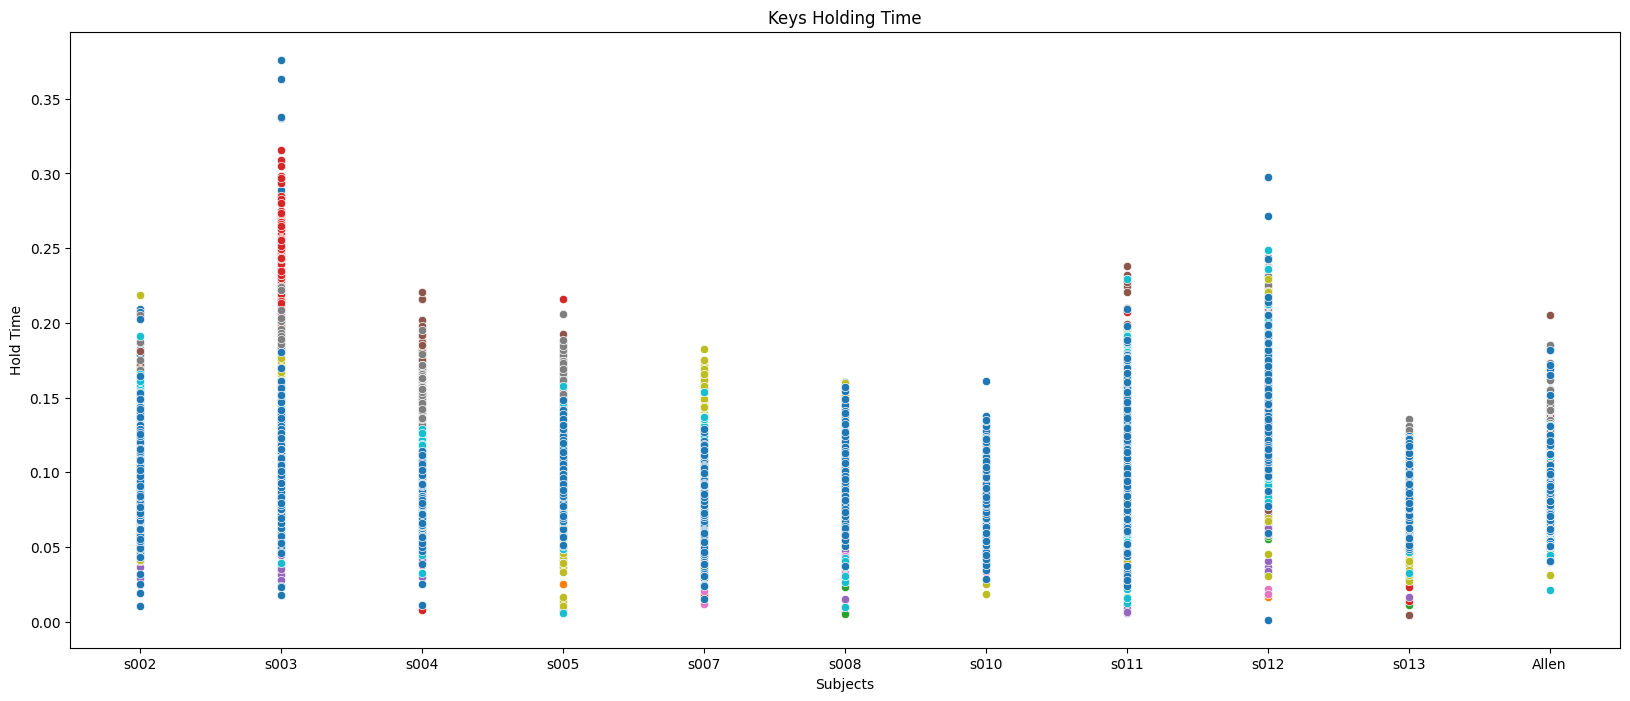

In [ ]:
# Select only the hold times
feature_columns = df_hybrid.columns[1:22]
H_columns = [h for h in feature_columns if h.startswith('H')]

df_hybrid_grouped = (df_hybrid.groupby(by='subject', axis=0).count().index[:35])
selected_subjects = df_hybrid[df_hybrid['subject'].isin(df_hybrid_grouped)]

index = selected_subjects['subject']
hold_dataset = selected_subjects[H_columns]
hold_dataset.index = selected_subjects.subject

# creating subplots to overlay the timings
fig, ax = plt.subplots(figsize=(20,8))

for h in H_columns:
    ax = sns.scatterplot(hold_dataset, x=hold_dataset.index, y=h)

ax.set(xlabel="Subjects", ylabel="Hold Time", title='Keys Holding Time')
plt.show()

#### Visualize Key transfer ''Up-to-Down'' keystroke features

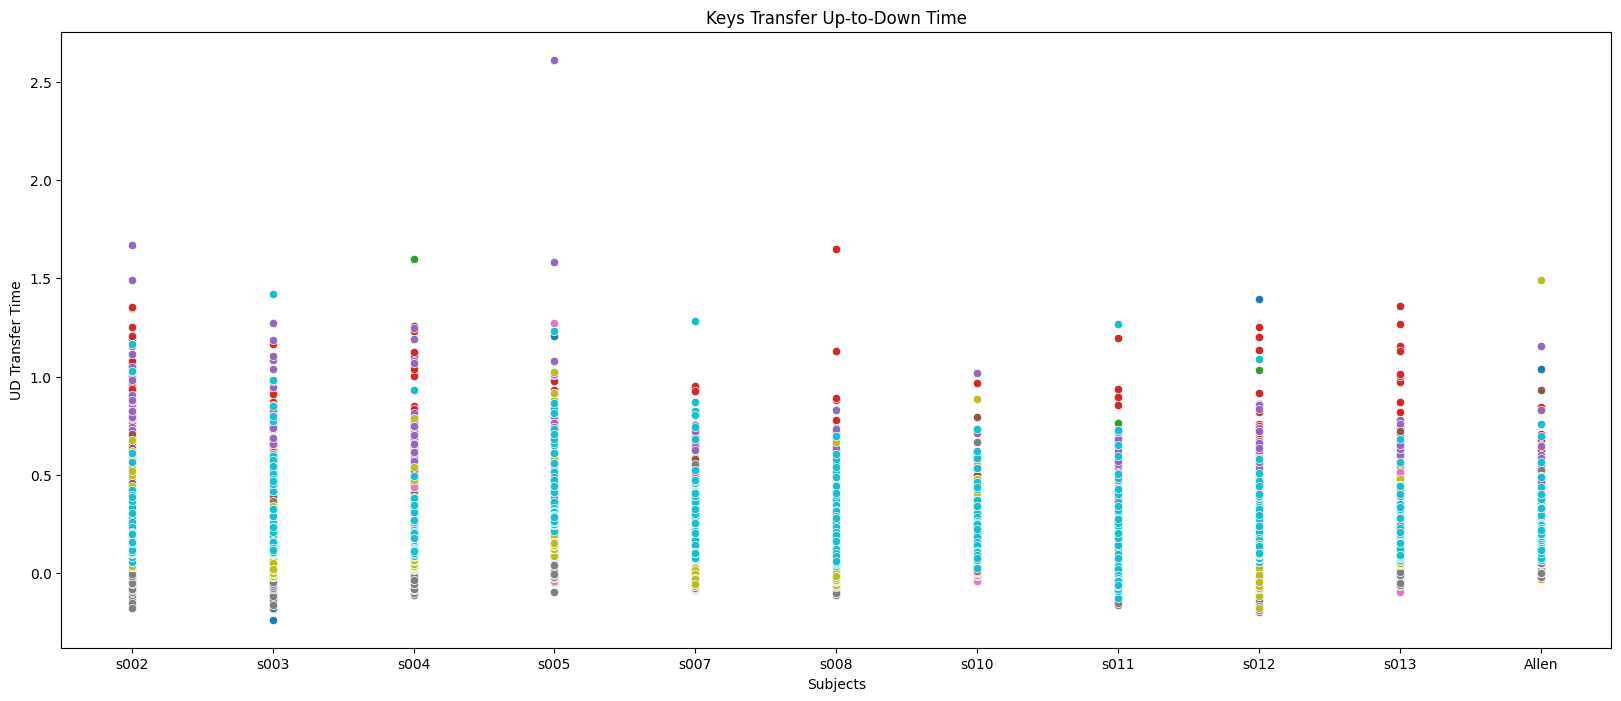

In [ ]:
# Select only the hold times
UD_columns = [h for h in feature_columns if h.startswith('UD')]


df_hybrid_grouped = (df_hybrid.groupby(by='subject', axis=0).count().index[:40])

selected_subjects = df_hybrid[df_hybrid['subject'].isin(df_hybrid_grouped)]

index = selected_subjects['subject']
ud_dataset = selected_subjects[UD_columns]
ud_dataset.index = selected_subjects.subject

# creating subplots to overlay the timings
fig, ax = plt.subplots(figsize=(20,8))

for h in UD_columns:
    ax = sns.scatterplot(ud_dataset, x=ud_dataset.index, y=h)

ax.set(xlabel="Subjects", ylabel="UD Transfer Time", title='Keys Transfer Up-to-Down Time')
plt.show()

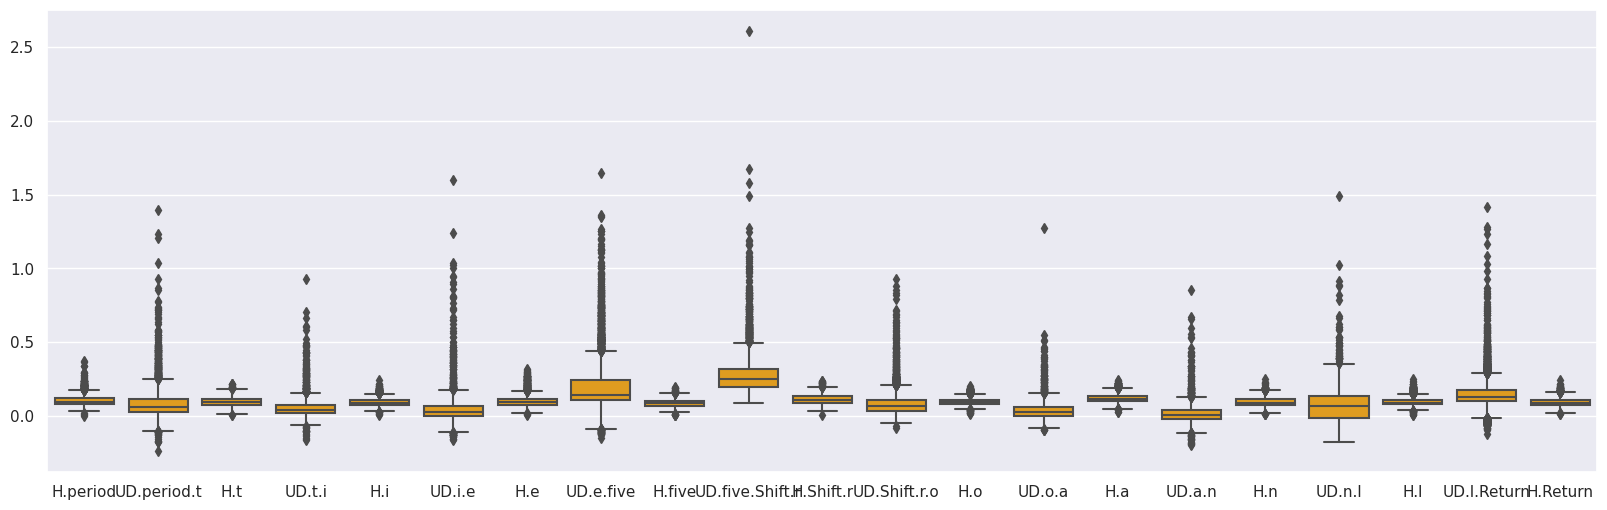

In [ ]:
X = df_hybrid.drop(columns=['subject'])
numerical_columns = X.select_dtypes(include='number')

# Set the default style
sns.set()
plt.figure(figsize=(20, 6))  # Specify width and height in inches
sns.boxplot(data=numerical_columns, color='orange') #palette='Set2')
plt.show()

#### Observation:

**All of "Up-to-Down" features have outliers**



### Encode the target feature 'subject'

In [ ]:
# Encode all target labels into integers
enc = LabelEncoder()
df_target_int = enc.fit_transform(df_hybrid['subject']).astype(int)

df_hybrid['subject'] = df_target_int.astype(int)

print("Classes:", enc.classes_)
# print(df_hybrid.describe())
# print(df_hybrid.info())

# One hot encoding
# Y = pd.get_dummies(y).values
# n_classes = Y.shape[1]
# print(n_classes)

Classes: ['Allen' 's002' 's003' 's004' 's005' 's007' 's008' 's010' 's011' 's012'
 's013']


### Create Features and Target arrays

In [ ]:
X = df_hybrid.drop(columns=['subject'])
y = df_hybrid['subject']
y = df_target_int
print(X.columns)

Index(['H.period', 'UD.period.t', 'H.t', 'UD.t.i', 'H.i', 'UD.i.e', 'H.e',
       'UD.e.five', 'H.five', 'UD.five.Shift.r', 'H.Shift.r', 'UD.Shift.r.o',
       'H.o', 'UD.o.a', 'H.a', 'UD.a.n', 'H.n', 'UD.n.l', 'H.l', 'UD.l.Return',
       'H.Return'],
      dtype='object')


In [ ]:
df_hybrid

,subject,H.period,UD.period.t,H.t,UD.t.i,H.i,UD.i.e,H.e,UD.e.five,H.five,...,UD.Shift.r.o,H.o,UD.o.a,H.a,UD.a.n,H.n,UD.n.l,H.l,UD.l.Return,H.Return
0,1,0.1491,0.2488,0.1069,0.0605,0.1169,0.1043,0.1417,1.0468,0.1146,...,0.6523,0.1016,0.1120,0.1349,0.0135,0.0932,0.2583,0.1338,0.2171,0.0742
1,1,0.1111,0.2340,0.0694,0.0589,0.0908,0.0449,0.0829,1.1141,0.0689,...,0.6307,0.1066,0.0618,0.1412,0.1146,0.1146,0.1496,0.0839,0.1917,0.0747
2,1,0.1328,0.0744,0.0731,0.0560,0.0821,0.0721,0.0808,0.9600,0.0892,...,0.5741,0.1365,0.1566,0.1621,0.0711,0.1172,0.1533,0.1085,0.1762,0.0945
3,1,0.1291,0.1224,0.1059,0.1436,0.1040,0.0998,0.0900,0.9656,0.0913,...,0.6096,0.0956,0.0574,0.1457,0.0172,0.0866,0.1475,0.0845,0.2387,0.0813
4,1,0.1249,0.1068,0.0895,0.0781,0.0903,0.0686,0.0805,0.7824,0.0742,...,0.6389,0.0430,0.1545,0.1312,0.0270,0.0884,0.1633,0.0903,0.1614,0.0818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,0,0.1440,-0.0030,0.1180,0.0800,0.0920,0.0690,0.0920,0.1370,0.0910,...,0.0700,0.0910,0.0710,0.1200,0.0500,0.0880,0.1720,0.1010,0.1200,0.0720
410,0,0.1320,0.0490,0.1020,0.1070,0.0910,0.0900,0.1120,0.1270,0.0910,...,0.1100,0.0820,0.0690,0.0820,0.0700,0.0980,0.1500,0.0810,0.1310,0.0610
411,0,0.1230,0.1200,0.0980,0.0700,0.1020,0.0600,0.1110,0.1370,0.1120,...,0.0700,0.1120,0.0290,0.1120,0.0600,0.0980,0.1420,0.0810,0.1010,0.0910
412,0,0.1210,0.1610,0.1110,0.0510,0.0880,0.0600,0.1220,0.1110,0.1010,...,0.1010,0.0980,0.0700,0.1010,0.0500,0.1020,0.1570,0.0710,0.1200,0.0620


#### Check outlier performance using Random Forest Classifier

In [ ]:
# Define function to calculate performance metric
def calculate_performance(df_p):
    # print(df_p.columns)
    # print(df_p.shape)
    X_features = df_p[['H.period', 'UD.period.t', 'H.t', 'UD.t.i', 'H.i', 'UD.i.e',
       'H.e', 'UD.e.five', 'H.five', 'UD.five.Shift.r', 'H.Shift.r',
       'UD.Shift.r.o', 'H.o', 'UD.o.a', 'H.a', 'UD.a.n', 'H.n', 'UD.n.l',
       'H.l', 'UD.l.Return', 'H.Return']]
    y_target = df_p['subject'].astype(int)
    model = RandomForestClassifier().fit(X_features, y_target)
    return model.score(X_features, y_target)

# Calculate performance with outliers
performance_with_outliers = calculate_performance(df_hybrid)
print(f'Performance with outliers: {performance_with_outliers}')

# Calculate performance without outliers
Q1 = df_hybrid.quantile(0.25)
Q3 = df_hybrid.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#print(df_hybrid.info())
df_no_outliers = df_hybrid[(df_hybrid >= lower_bound) & (df_hybrid <= upper_bound)].dropna()

num_rows = df_no_outliers.shape[0]
if num_rows > 0:
  #print(df_no_outliers)
  performance_without_outliers = calculate_performance(df_no_outliers)
  print(f'Performance without outliers: {performance_without_outliers}')
else:
  print('The  df_no_outliers dataframe is empty.')


Performance with outliers: 1.0
Performance without outliers: 1.0


### Features' importance

UD.n.l          | 0.135
H.Shift.r       | 0.075
UD.l.Return     | 0.074
H.a             | 0.063
H.n             | 0.059
H.t             | 0.053
H.period        | 0.053
H.i             | 0.049
H.e             | 0.049
H.l             | 0.046
H.Return        | 0.045
UD.period.t     | 0.037
UD.i.e          | 0.037
UD.e.five       | 0.036
UD.five.Shift.r | 0.036
UD.o.a          | 0.034
H.five          | 0.033
UD.Shift.r.o    | 0.026
H.o             | 0.023
UD.t.i          | 0.020
UD.a.n          | 0.017


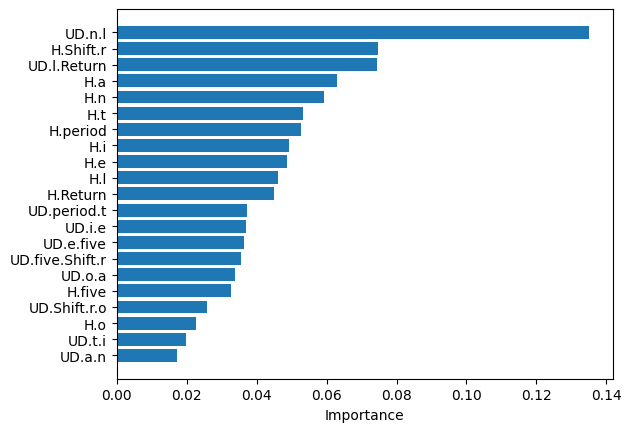

In [ ]:
# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

# Get feature importances
importances = rfc.feature_importances_

# Sort feature importances in descending order
sorted_importances = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

# Determine column widths
max_feature_len = max(len(feature) for feature, _ in sorted_importances)
max_importance_len = max(len(f'{importance:.3f}') for _, importance in sorted_importances)

# Print feature importances in columns
for feature, importance in sorted_importances:
    print(f'{feature.ljust(max_feature_len)} | {importance:.3f}'.ljust(max_feature_len + max_importance_len + 3))

# Create a bar chart
fig, ax = plt.subplots()
y_pos = range(len(sorted_importances))
ax.barh(y_pos, [val for _, val in sorted_importances])
ax.set_yticks(y_pos)
ax.set_yticklabels([feat for feat, _ in sorted_importances])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance')

# Display the chart
plt.show()

### Split dataset for training and testing

In [ ]:
# Split data to train and test models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

### Scale features

In [ ]:
# Scale the features
# min_max_scaler = MinMaxScaler()
# X_train_scaled = min_max_scaler.fit_transform(X_train)
# X_train_scaled
# X_test_scaled = min_max_scaler.transform(X_test)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_train_scaled
X_test_scaled = standard_scaler.transform(X_test)

#### Modelling and hyperparameter fine tuning

#### 2.2 (A) SVM with RBF Kernel

In [ ]:
# Create Pipeline for scaling and SVC model on rgf kernel
mypipeline = Pipeline([("scaler", StandardScaler()),("svm", SVC(random_state=42))])

# Run grid search
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(mypipeline, param_grid=param_grid, cv=10, verbose = 2)
grid.fit(X_train, y_train)



Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END .....................svm__C=0.001, svm__gamma=0.001; total time=   2.1s
[CV] END .....................svm__C=0.001, svm__gamma=0.001; total time=   1.8s
[CV] END .....................svm__C=0.001, svm__gamma=0.001; total time=   1.1s
[CV] END .....................svm__C=0.001, svm__gamma=0.001; total time=   1.1s
[CV] END .....................svm__C=0.001, svm__gamma=0.001; total time=   1.1s
[CV] END .....................svm__C=0.001, svm__gamma=0.001; total time=   1.1s
[CV] END .....................svm__C=0.001, svm__gamma=0.001; total time=   1.1s
[CV] END .....................svm__C=0.001, svm__gamma=0.001; total time=   1.5s
[CV] END .....................svm__C=0.001, svm__gamma=0.001; total time=   1.8s
[CV] END .....................svm__C=0.001, svm__gamma=0.001; total time=   1.8s
[CV] END ......................svm__C=0.001, svm__gamma=0.01; total time=   1.1s
[CV] END ......................svm__C=0.001, s

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(random_state=42))]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             verbose=2)

In [ ]:
# Print results of run
print("Best cross validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross validation accuracy: 0.94
Test set score: 0.93
Best parameters: {'svm__C': 10, 'svm__gamma': 0.01}


Confusion matrix:
[[74  5  1  0  2  0  1  0  0  0  0]
 [ 1 71  1  1  1  1  1  0  1  2  0]
 [ 1  1 73  2  0  1  1  0  0  1  0]
 [ 0  5  0 73  0  1  1  0  0  0  0]
 [ 0  0  0  0 79  0  1  0  0  0  0]
 [ 0  1  1  0  0 73  4  0  1  0  0]
 [ 1  0  1  1  0  2 74  0  1  0  0]
 [ 0  0  0  0  0  0  0 79  0  0  1]
 [ 0  2  1  0  0  2  0  0 72  3  0]
 [ 0  2  3  0  0  1  1  0  0 73  0]
 [ 0  1  0  1  0  0  1  1  0  0 76]]


[Text(0.5, 19.049999999999997, 'Predicted Class'),
 Text(46.25, 0.5, 'True Class'),
 Text(0.5, 1.0, 'Confusion Matrix')]

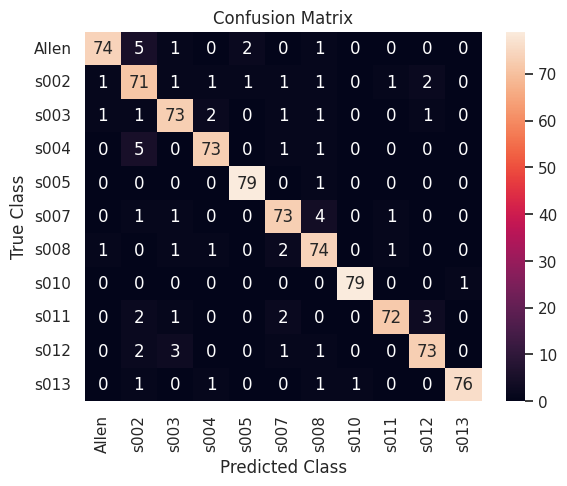

In [ ]:
# Measure confusion matric on test data
best_pipeline = Pipeline([("scaler", StandardScaler()),("svm", SVC(C=grid.best_params_['svm__C']
                                                                   ,gamma=grid.best_params_['svm__gamma']
                                                                   ,kernel='rbf'))])
best_pipeline.fit(X_train, y_train)
y_pred = best_pipeline.predict(X_test)

print("Confusion matrix:\n{}".format(confusion_matrix(y_test,y_pred)))

score_image1 = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, xticklabels=enc.classes_,
                          yticklabels=enc.classes_)
score_image1.set(xlabel='Predicted Class', ylabel='True Class', title='Confusion Matrix')

In [ ]:
# Classification reporting
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        83
           1       0.81      0.89      0.85        80
           2       0.90      0.91      0.91        80
           3       0.94      0.91      0.92        80
           4       0.96      0.99      0.98        80
           5       0.90      0.91      0.91        80
           6       0.87      0.93      0.90        80
           7       0.99      0.99      0.99        80
           8       0.96      0.90      0.93        80
           9       0.92      0.91      0.92        80
          10       0.99      0.95      0.97        80

    accuracy                           0.93       883
   macro avg       0.93      0.93      0.93       883
weighted avg       0.93      0.93      0.93       883



#### 2.2 (B) SVM with Polynomial kernel

In [ ]:
# Create Pipeline for scaling and SVC model on polynomial kernel
mypipeline2 = Pipeline([("scaler", StandardScaler()),("svm", SVC(kernel='poly', random_state=42))])

# Run grid search
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
          'svm__degree': [1, 2, 3, 4, 5]}
grid = GridSearchCV(mypipeline2, param_grid=param_grid, cv=10, verbose=2)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END ........................svm__C=0.001, svm__degree=1; total time=   0.8s
[CV] END ........................svm__C=0.001, svm__degree=1; total time=   0.9s
[CV] END ........................svm__C=0.001, svm__degree=1; total time=   0.9s
[CV] END ........................svm__C=0.001, svm__degree=1; total time=   0.8s
[CV] END ........................svm__C=0.001, svm__degree=1; total time=   0.9s
[CV] END ........................svm__C=0.001, svm__degree=1; total time=   1.5s
[CV] END ........................svm__C=0.001, svm__degree=1; total time=   1.5s
[CV] END ........................svm__C=0.001, svm__degree=1; total time=   1.5s
[CV] END ........................svm__C=0.001, svm__degree=1; total time=   1.0s
[CV] END ........................svm__C=0.001, svm__degree=1; total time=   0.8s
[CV] END ........................svm__C=0.001, svm__degree=2; total time=   0.9s
[CV] END ........................svm__C=0.001,

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        SVC(kernel='poly', random_state=42))]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__degree': [1, 2, 3, 4, 5]},
             verbose=2)

In [ ]:
# Print results of run
print("Best cross validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross validation accuracy: 0.93
Test set score: 0.92
Best parameters: {'svm__C': 10, 'svm__degree': 3}


Confusion matrix:
[[74  6  0  0  2  0  1  0  0  0  0]
 [ 1 69  4  2  1  0  1  0  0  2  0]
 [ 0  1 67  7  1  0  1  0  1  2  0]
 [ 0  5  0 73  0  1  0  0  1  0  0]
 [ 0  0  0  0 80  0  0  0  0  0  0]
 [ 0  1  0  1  0 75  3  0  0  0  0]
 [ 2  1  0  0  0  1 74  0  2  0  0]
 [ 0  0  0  0  0  0  0 80  0  0  0]
 [ 1  1  1  0  0  1  1  0 74  1  0]
 [ 0  0  5  0  0  1  2  0  0 72  0]
 [ 1  1  0  0  0  0  2  1  0  0 75]]

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        83
           1       0.81      0.86      0.84        80
           2       0.87      0.84      0.85        80
           3       0.88      0.91      0.90        80
           4       0.95      1.00      0.98        80
           5       0.95      0.94      0.94        80
           6       0.87      0.93      0.90        80
           7       0.99      1.00      0.99        80
           8       0.95      0.93      0.94        80
           9       0.94      0.90      0.92

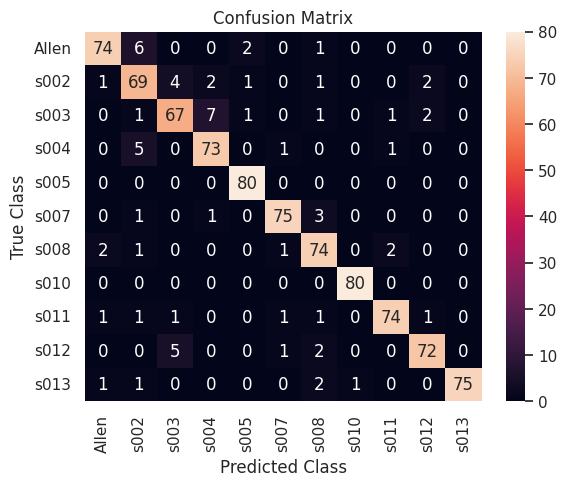

In [ ]:
# Measure confusion matric on test data
best_pipeline = Pipeline([("scaler", StandardScaler()),("svm", SVC(C=grid.best_params_['svm__C']
                                                                   ,degree=grid.best_params_['svm__degree']
                                                                   ,kernel='poly'))])
best_pipeline.fit(X_train, y_train)
y_pred = best_pipeline.predict(X_test)

print("Confusion matrix:\n{}".format(confusion_matrix(y_test,y_pred)))

score_image1 = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, xticklabels=enc.classes_,
                          yticklabels=enc.classes_)
score_image1.set(xlabel='Predicted Class', ylabel='True Class', title='Confusion Matrix')

# Classification reporting
print()
print(classification_report(y_test, y_pred))

#### 2.2 (C) Gradient Boost Ensemble

<b>Note</b>: <i>This grid search takes around 2 hrs to complete.  Keep this in mind before re-running.</i>

In [ ]:
# Instantiate sklearn Gradient Boost Ensemble model
clf = GradientBoostingClassifier(random_state=42)

# Run grid search
param_grid = {'n_estimators': [200, 300],
              'learning_rate': [0.01, 0.1, 1, 10],
              'subsample': [0.8, 0.9, 1.0]}

grid = GridSearchCV(clf, param_grid=param_grid, cv=10, verbose=2)
grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END learning_rate=0.01, n_estimators=200, subsample=0.8; total time=  31.0s
[CV] END learning_rate=0.01, n_estimators=200, subsample=0.8; total time=  32.0s
[CV] END learning_rate=0.01, n_estimators=200, subsample=0.8; total time=  31.6s
[CV] END learning_rate=0.01, n_estimators=200, subsample=0.8; total time=  31.2s
[CV] END learning_rate=0.01, n_estimators=200, subsample=0.8; total time=  30.8s
[CV] END learning_rate=0.01, n_estimators=200, subsample=0.8; total time=  31.6s
[CV] END learning_rate=0.01, n_estimators=200, subsample=0.8; total time=  31.4s
[CV] END learning_rate=0.01, n_estimators=200, subsample=0.8; total time=  31.2s
[CV] END learning_rate=0.01, n_estimators=200, subsample=0.8; total time=  30.7s
[CV] END learning_rate=0.01, n_estimators=200, subsample=0.8; total time=  31.0s
[CV] END learning_rate=0.01, n_estimators=200, subsample=0.9; total time=  34.0s
[CV] END learning_rate=0.01, n_estimators=200,

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=2)

In [ ]:
# Print results of run
print("Best cross validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(standard_scaler.transform(X_test), y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross validation accuracy: 0.97
Test set score: 0.96
Best parameters: {'learning_rate': 0.1, 'n_estimators': 300, 'subsample': 0.9}


<b>Conclusions</b>:  Best hyperparameters to use are learning rate of 0.1, estimator count of 300 and sample fraction of 0.9 used for fitting individual base models.  For a value of 0.9, this is actually a stochastic gradient boosting algorithm.

Confusion matrix:
[[79  2  0  1  0  0  1  0  0  0  0]
 [ 0 76  0  0  1  0  1  0  0  2  0]
 [ 0  1 78  0  0  0  0  0  0  1  0]
 [ 0  6  0 73  0  1  0  0  0  0  0]
 [ 0  0  0  0 80  0  0  0  0  0  0]
 [ 0  0  0  0  0 79  1  0  0  0  0]
 [ 0  0  0  1  0  0 79  0  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0  0]
 [ 0  1  1  0  0  0  1  0 75  2  0]
 [ 0  0  1  0  0  0  2  0  0 77  0]
 [ 0  1  0  1  0  0  3  0  0  0 75]]


[Text(0.5, 23.52222222222222, 'Predicted Class'),
 Text(50.722222222222214, 0.5, 'True Class'),
 Text(0.5, 1.0, 'Confusion Matrix for Gradient Boost')]

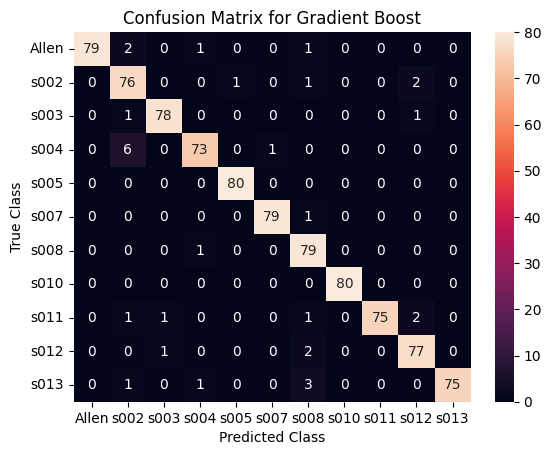

In [ ]:
clf = GradientBoostingClassifier(random_state=42, learning_rate=0.1, n_estimators=300, subsample=0.9)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(standard_scaler.transform(X_test))

print("Confusion matrix:\n{}".format(confusion_matrix(y_test,y_pred)))

score_image1 = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, xticklabels=enc.classes_,
                          yticklabels=enc.classes_)
score_image1.set(xlabel='Predicted Class', ylabel='True Class', title='Confusion Matrix for Gradient Boost')



In [ ]:
# Classification reporting
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        83
           1       0.87      0.95      0.91        80
           2       0.97      0.97      0.97        80
           3       0.96      0.91      0.94        80
           4       0.99      1.00      0.99        80
           5       0.99      0.99      0.99        80
           6       0.90      0.99      0.94        80
           7       1.00      1.00      1.00        80
           8       1.00      0.94      0.97        80
           9       0.94      0.96      0.95        80
          10       1.00      0.94      0.97        80

    accuracy                           0.96       883
   macro avg       0.97      0.96      0.96       883
weighted avg       0.97      0.96      0.96       883



<b>Observation</b>: Gradient Boost Ensemble achieved a high accuracy of 0.97 for average F1 Score across the classes of 11 subjects, with each achieving FI score above 0.90 on the test dataset.  This is a good enough performance for production deployment.  This will be the finalised model to be deployed.

## Error Analysis on Finalised Model Predictions

Although the Gradient Boost Ensemble model produce high accuracy score on the test dataset, there is some specific class, namely Subject 's002' that has relatively higher number of mis-classification. There are 7 samples under 'S004' that are incorrectly predicted as 'S002' by the final trained model.

This section attempts to analyse the wrongly classified test samples to have a better understanding on the reason.

In [ ]:
# Retrieve dataset related to subject 's004' from X_test - WIP
df1 = X_test.copy()
df1['subject'] = y_test

df_s004 = df1[df1['subject'] == 3]

X_s004 = df_s004.drop(['subject'], axis=1)
y_s004 = clf.predict(standard_scaler.transform(X_s004))

print(y_s004)

[3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3
 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3
 3 3 1 3 3 3]


In [ ]:
# stored the predicted results
df_s004['predicted'] = y_s004

# check wrong data point
wrong_s004 = df_s004[df_s004['subject'] != df_s004['predicted']]

wrong_s004

<ipython-input-184-835e4e9dcd06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s004['predicted'] = y_s004


,H.period,UD.period.t,H.t,UD.t.i,H.i,UD.i.e,H.e,UD.e.five,H.five,UD.five.Shift.r,...,UD.o.a,H.a,UD.a.n,H.n,UD.n.l,H.l,UD.l.Return,H.Return,subject,predicted
808,0.1127,0.1015,0.0731,0.0370,0.0837,0.0539,0.0623,0.4950,0.0774,0.8129,...,0.0566,0.1111,0.0325,0.0718,0.0916,0.0961,0.1733,0.0805,3,1
853,0.0977,0.1612,0.0541,0.1082,0.1040,0.0227,0.0760,0.4378,0.0449,0.4054,...,0.0922,0.0900,0.2571,0.1035,0.0821,0.1077,0.1854,0.0882,3,5
810,0.1230,0.0807,0.1000,0.0547,0.1029,0.0510,0.0905,1.0028,0.0892,0.6796,...,0.0291,0.1259,0.0032,0.1008,0.0916,0.0998,0.1427,0.0784,3,1
1000,0.1117,0.0633,0.0921,0.0058,0.0832,-0.0048,0.0843,1.1249,0.0618,0.4083,...,-0.0137,0.1201,0.0257,0.0879,0.1657,0.1040,0.1353,0.0710,3,1
850,0.1032,0.1944,0.0845,0.0837,0.0855,0.0436,0.0884,0.7309,0.0489,0.7490,...,0.0225,0.0924,0.0391,0.0810,0.1042,0.0927,0.2063,0.0697,3,1
854,0.1022,0.0955,0.0884,0.0372,0.0908,0.0014,0.0953,0.3937,0.0584,0.3806,...,0.1051,0.1085,0.0550,0.0995,0.1187,0.0803,0.1540,0.0473,3,1
801,0.1183,0.4863,0.0634,0.0737,0.0927,0.0547,0.0665,1.1251,0.0681,1.0794,...,0.0231,0.0871,0.0573,0.1169,0.1296,0.1006,0.3369,0.0826,3,1


In [ ]:
# Get the correctly labelled samples
correct_s004 = df_s004[df_s004['subject'] == df_s004['predicted']]

correct_s004

,H.period,UD.period.t,H.t,UD.t.i,H.i,UD.i.e,H.e,UD.e.five,H.five,UD.five.Shift.r,...,UD.o.a,H.a,UD.a.n,H.n,UD.n.l,H.l,UD.l.Return,H.Return,subject,predicted
1038,0.0982,0.0163,0.1325,0.0040,0.1086,-0.0843,0.0800,0.0819,0.1053,0.3519,...,-0.0100,0.0872,-0.0240,0.1119,0.0570,0.1022,0.0931,0.0905,3,3
1055,0.1246,0.0894,0.1130,0.0367,0.1246,-0.0417,0.0879,0.1631,0.1180,0.3112,...,-0.0256,0.1349,-0.0253,0.0805,0.0385,0.0950,0.1271,0.0763,3,3
895,0.1008,0.0912,0.1109,0.0193,0.0950,0.0077,0.0845,0.1974,0.0942,0.5838,...,-0.0179,0.1413,-0.0238,0.0906,0.0467,0.0871,0.1023,0.0729,3,3
919,0.1201,0.0358,0.0824,0.0116,0.0991,-0.0138,0.0935,0.2037,0.0715,0.3128,...,0.4392,0.0895,0.0333,0.0876,0.0763,0.1045,0.2184,0.0705,3,3
1060,0.1124,0.1108,0.1241,0.0409,0.0904,-0.0320,0.0721,0.1106,0.0995,0.2688,...,-0.0100,0.1304,-0.0327,0.0979,0.0303,0.1095,0.1572,0.0940,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0.0921,0.0340,0.1380,0.0072,0.1006,-0.0784,0.0908,0.0713,0.1006,0.5062,...,0.0085,0.1642,0.0119,0.1048,0.0678,0.1024,0.1113,0.0744,3,3
1054,0.0956,0.0429,0.0937,0.0557,0.0951,-0.0623,0.0811,0.2106,0.0301,0.4094,...,0.0099,0.1520,-0.0282,0.0816,0.0586,0.0908,0.1007,0.0650,3,3
957,0.1048,0.0414,0.0816,0.0256,0.0934,-0.0095,0.0660,0.3771,0.0673,0.2434,...,-0.0430,0.1170,0.0296,0.0824,0.0380,0.0956,0.1020,0.0715,3,3
807,0.0995,0.1131,0.0842,0.0541,0.0993,0.0219,0.0792,0.4417,0.0684,0.5787,...,0.0684,0.1188,0.0288,0.0697,0.0654,0.0956,0.1366,0.0816,3,3


#### Comparison of Key Hold Duration

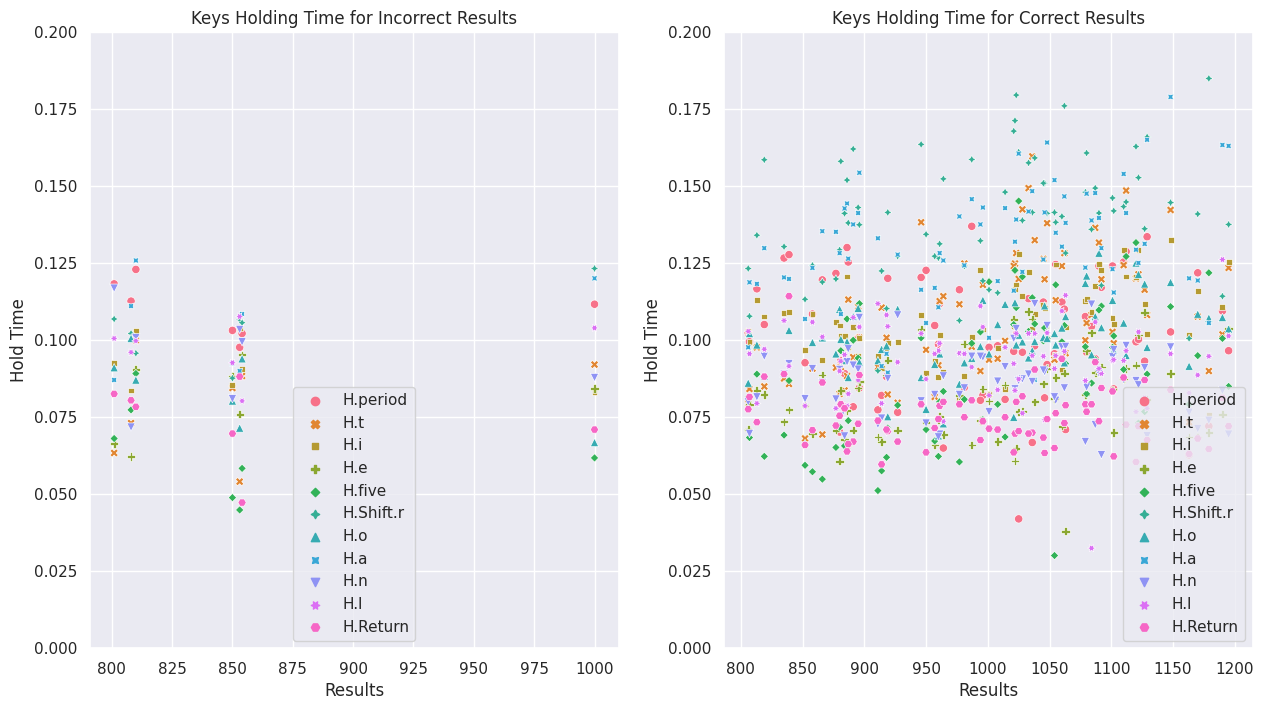

In [ ]:
# Get their Hold times for comparison
hold_col = [x for x in df_s004.columns if x.startswith('H')]
hold_wrong_s004 = wrong_s004[hold_col]

# creating subplots to overlay the timings
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,8))

#for h in hold_col:
#    ax = sns.scatterplot(hold_df_s004, x=df_s004['results'], y=h)

ax = sns.scatterplot(hold_wrong_s004, ax=ax1)
ax = sns.scatterplot(correct_s004[hold_col], ax=ax2)

ax1.set(xlabel="Results", ylabel="Hold Time", title='Keys Holding Time for Incorrect Results', ylim=(0,0.2))
ax2.set(xlabel="Results", ylabel="Hold Time", title='Keys Holding Time for Correct Results', ylim=(0,0.2))
plt.show()

<b>Observations</b>: Comparison plotting between the incorrectly classified and correctly classified samples indicates that some distribution differences that might account for the reason why the model has failed to classified them correctly.  For example, the key hold duration for 'H.Shift.r' (Shift-R key press) is longer for those correctly classified samples than those which are incorrectly classified by the model.
In addition, the incorrectly classified samples tends to cluster around 4 sampling sessions as can be seen from the x-axis.  This might be due to some abnormal keypress from the subject during that particular session or day when data is captured.

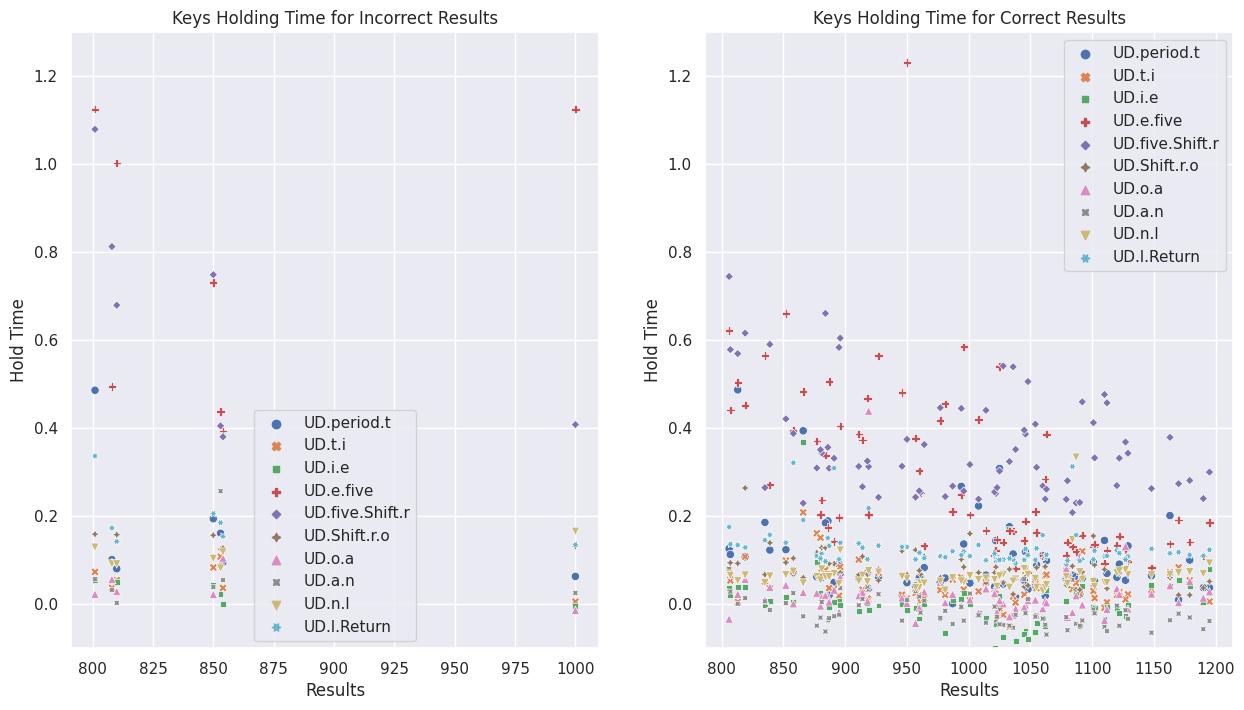

In [ ]:
# Get their Up-to-Down times (key travel duration) for comparison
du_col = [x for x in df_s004.columns if x.startswith('UD.')]

# creating subplots to overlay the timings
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,8))

#for h in hold_col:
#    ax = sns.scatterplot(hold_df_s004, x=df_s004['results'], y=h)

ax = sns.scatterplot(wrong_s004[du_col], ax=ax1)
ax = sns.scatterplot(correct_s004[du_col], ax=ax2)

ax1.set(xlabel="Results", ylabel="Hold Time", title='Keys Holding Time for Incorrect Results', ylim=(-0.1,1.3))
ax2.set(xlabel="Results", ylabel="Hold Time", title='Keys Holding Time for Correct Results', ylim=(-0.1,1.3))
plt.show()

<p><b>Observations</b>: There are many samples with negative key travel timing in the correctly classified samples for this subject.  This suggests that the subject has pressed the next key before releasing the previous key in sequence.  This might be a characteristic of this particular subject.  For example, for the correctly classified samples on the right chart, the are many samples with negative values for UD.i.e (green) and UD.a.n. But this is not observed from the incorrectly classified samples on the left.  Hence, the subject's keystroke dynamic might not be consistent for those samples.</p>
<p>A possible solution to mitigate such abnormal sample might be to have subject performance the keystroke for a number of times and taking the average of the timing for prediction.  This might generate a more consistent outcome and improve accuracy in prediction.</p>

## Packaging the Finalised Trained Model for Deployment

In [ ]:
# Fit encoder
enc = LabelEncoder()
enc.fit(df_target)

# Create pipeline
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('gboost', GradientBoostingClassifier(random_state=42, learning_rate=0.1, n_estimators=300, subsample=0.9))])


# Fit Pipeline
pipeline.fit(X_train, y_train)

# Save encoder
filename1 = data_dir_path + 'Model/encoder.sav'
pickle.dump(enc, open(filename1, 'wb'))

# Save model
filename2 = data_dir_path + 'Model/finalized_model.sav'
pickle.dump(clf, open(filename2, 'wb'))